<a href="https://colab.research.google.com/github/NikitaMarnykh/labor_market_analysis/blob/main/%D0%9C%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D0%9D_%D0%92_%D0%B8_%D0%9E%D0%B1%D0%BE%D1%80%D0%BE%D1%82%D0%BE%D0%B2_%D0%9C_%D0%92_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D1%8B%D0%BD%D0%BA%D0%B0_%D1%82%D1%80%D1%83%D0%B4%D0%B0_advanced_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Постановка задачи и описание датасета

Перед Департаментом труда и занятости населения Томской области стоит задача
– в течение полугода разработать эффективные стратегии управления
персоналом, образования и подготовки кадров в целях увеличения уровня
занятости в регионе на 2 процентных пункта. Для этого специалистам необходимо
лучше понять особенности функционирования рынка труда, а именно: в какие
города области и какие специалисты требуются, какими ключевыми навыками они
должны обладать, какие условия труда предлагают работодатели, есть ли
возможность трудоустроиться соискателям с инвалидностью.
Специалистами Роснавыка были представлены датасеты с выгруженной
информацией по региону.

**Задачи:**

  - Проанализируйте ключевые навыки в самой популярной сфере/сферах в регионе и выявить значимые взаимосвязи между признаками (на какие навыки и в каких городах наибольший спрос, есть ли взаимосвязь между навыками и требованиями к соискателям, как тот или иной навык влияет на условия труда) (датасет hh_hard.csv)

  - построить регрессионную модель для предсказания уровня заработной платы.

  - Представьте аналитический отчет содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения его бизнес-задач.

**Исходные данные:**

  - идентификатор вакансии (id)

  - наименование вакансии (name)

  - профессиональная роль (professional roles)

  - регион (area), в т.ч. страна (country), регион (region), округ (district), город(city)

  - заработная плата (salary), в т.ч. минимальная заработная плата (salary_from),
максимальная заработная плата (salary_to)

  - опыт работы (experience): 0 – без опыта, 1-3 – от 1 до 3 лет, 3-6 – от 3 до 6 лет, 6- - от 6 лет

  - график работы (schedule): full_day – полный день, remote – удаленная работа,
  flexible – гибкий график, shift – сменный график, labor - вахтовый метод

  - тип занятости (employment): full – полная занятость, part – частичная
занятость, project – проектная работа, probation - стажировка

  - наименование работодателя (employer)

  - доступна ли вакансия для соискателей с инвалидностью (accept_handicapped): True – доступна, False - недоступна

  - ключевые навыки (key_skills)

**Датасет в формате csv по ссылке:**

  - https://disk.yandex.ru/d/OYP_n5bYz_ExzA


## 2. Установка и подключение зависимостей

Устанавливаем все необходимые зависимости

In [2292]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scipy
!pip install seaborn
!pip install statsmodels
!pip install scikit-learn
!pip install missingno

Подключаем все необходимые зависимости

In [2293]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats

import seaborn as sns

import re

import json

import ast

import missingno as msno

from sklearn.impute import KNNImputer

Подгружаем репозиторий для работы с ним

In [2294]:
!git clone https://github.com/NikitaMarnykh/labor_market_analysis

Cloning into 'labor_market_analysis'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 38 (delta 21), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 1.97 MiB | 6.31 MiB/s, done.
Resolving deltas: 100% (21/21), done.


Перейдём в установленный репозиторий

In [2295]:
%cd labor_market_analysis/

/content/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis/labor_market_analysis


## 3. Первичный обзор датасета. Оценка размеров датасета, наличия дубликатов и пропусков

Сохраняем датасет в переменную

In [2296]:
dataset = pd.read_csv('hh_hard.csv',
                      na_values=['NA', 'N/A', 'null', 'missing', '-', '?', '...'],
                      keep_default_na=True,
                      na_filter=True)

Проведём обзор содержимого таблицы

In [2297]:
dataset.head(15)

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}"
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}"
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}"
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}"
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}"
5,72124633,Дефектоскопист,Технолог,1-3,full_day,full,Деталь Проект,False,"['Ведение документооборота', 'Базовые знания П...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":60000.0}"
6,72124864,Водитель-кладовщик,Водитель,0,full_day,full,Автоцентр АВТОГИК,False,"['Базовые знания ПК', 'Коммуникативная грамотн...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":35000.0,""salary_to"":85000.0}"
7,72125286,Электромонтер,Электромонтажник,3-6,labor,full,Эко-Системы,False,"['Монтаж металлоконструкций', 'Выполнение стро...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":100000.0,""salary_to"":150000.0}"
8,72125786,Менеджер по продажам,"Менеджер по продажам, менеджер по работе с кли...",1-3,full_day,full,"Мототека, филиал г.Томск",False,"['Продажи', 'Коммуникативная грамотность', 'Гр...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":95000.0}"
9,72125979,Менеджер по продажам,Агент по недвижимости,0,full_day,full,ДомПлюс,False,"['Продажи', 'Продажи', 'Коммуникативная грамот...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":80000.0,""salary_to"":null}"


Просмотрим информацию о датасете

In [2298]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20178 entries, 0 to 20177
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20178 non-null  int64 
 1   name                20178 non-null  object
 2   professional_roles  20178 non-null  object
 3   experience          20178 non-null  object
 4   schedule            20178 non-null  object
 5   employment          20178 non-null  object
 6   employer            20178 non-null  object
 7   accept_handicapped  20178 non-null  bool  
 8   key_skills          20178 non-null  object
 9   area                20178 non-null  object
 10  salary              20178 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 1.6+ MB


Информация, содержащаяся в датасете:
  
  - идентификатор вакансии (id)

  - наименование вакансии (name)

  - профессиональная роль (professional roles)

  - регион (area), в т.ч. страна (country), регион (region), округ (district), город(city)

  - заработная плата (salary), в т.ч. минимальная заработная плат (salary_from), максимальная заработная плата (salary_to)

  - опыт работы (experience)

  - график работы (schedule)

  - тип занятости (employment)

  - наименование работодателя (employer)

  - доступна ли вакансия для соискателей с инвалидностью (accept_handicapped)
  
  - ключевые навыки (key_skills)

Оценим размеры датасета

In [2299]:
dataset.shape

(20178, 11)

Оценим наличие полных дубликатов в датасете

In [2300]:
dataset.duplicated(keep=False).sum()

np.int64(356)

Оценим наличие пропущенных значений в датасете

In [2301]:
dataset.isnull().sum()

,0
id,0
name,0
professional_roles,0
experience,0
schedule,0
employment,0
employer,0
accept_handicapped,0
key_skills,0
area,0


Выводы по предварительному осмотру:

* **О размерах датасета**:

  20178 строк (наблюдений), 11 столбцов (признаков)

* **О типах данных**:

  - Количественные признаки:

    * идентификатор вакансии (id)

    * заработная плата (salary)

  - Категориальные признаки:

    * наименование вакансии (name)

    * профессиональная роль (professional roles)

    * регион (area)

    * опыт работы (experience)

    * график работы (schedule)

    * тип занятости (employment)

    * наименование работодателя (employer)

    * доступна ли вакансия для соискателей с инвалидностью (accept_handicapped)

    * ключевые навыки (key_skills)


* **О дубликатах**:

  - Присутствуют полные дубликаты


* **О пропущенных значениях:**

  - Пропущенных значений нет ни в одном из признаков

  - Возможно на этапе обработки признаков появятся нулевые значения там, где их быть не должно

## 4. Предобработка данных

Посмотрим на полные дубликаты

In [2302]:
dataset[dataset.duplicated(keep=False)].sort_values(['professional_roles'])

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary
20121,55287186,SMM специалист,"SMM-менеджер, контент-менеджер",1-3,full_day,full,Smart World (Умный мир),False,"['Знание основ в области маркетинга', 'Продвиж...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":null}"
3644,55287186,SMM специалист,"SMM-менеджер, контент-менеджер",1-3,full_day,full,Smart World (Умный мир),False,"['Знание основ в области маркетинга', 'Продвиж...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":null}"
20175,83414938,Ученик автослесаря,"Автослесарь, автомеханик",0,shift,probation,Атом Авто Томск,False,"['Знание технических характеристик, конструкци...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":null}"
12907,83414938,Ученик автослесаря,"Автослесарь, автомеханик",0,shift,probation,Атом Авто Томск,False,"['Знание технических характеристик, конструкци...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":40000.0,""salary_to"":null}"
20085,66564937,Агент по недвижимости,Агент по недвижимости,1-3,flexible,full,Агентство недвижимости Успех,False,"['Работа с жилой недвижимостью', 'Работа с жил...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":50000.0,""salary_to"":300000.0}"
...,...,...,...,...,...,...,...,...,...,...,...
16317,91850385,Юрисконсульт 1 категории,Юрисконсульт,3-6,full_day,full,Газпром трансгаз Томск,False,"['Коммуникативная грамотность', 'Составление д...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":null}"
1718,83514395,Консультант отдела контроля застройки и землеп...,Юрист,0,full_day,full,Администрация Ленинского района Города Томска,False,"['Ответственность', 'Самоорганизованность', 'М...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":32000.0,""salary_to"":34000.0}"
20048,83514395,Консультант отдела контроля застройки и землеп...,Юрист,0,full_day,full,Администрация Ленинского района Города Томска,False,"['Ответственность', 'Самоорганизованность', 'М...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":32000.0,""salary_to"":34000.0}"
20042,92102447,Судебный юрист,Юрист,3-6,full_day,full,Юридическая фирма ЛЛ.Си-Право,False,"['Знание общих нормативно-правовых актов РФ', ...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":null}"


Удалим полные дубликаты

In [2303]:
dataset.drop_duplicates(inplace=True)

Заново проиндексируем датасет

In [2304]:
dataset.reset_index(drop=True, inplace=True)

Проверим индексацию

In [2305]:
dataset.index

RangeIndex(start=0, stop=20000, step=1)

### 4.1 Обработка признака id

Запишем имя признака в переменную sign

In [2306]:
sign = 'id'

Выведем признак для просмотра содержимого

In [2307]:
dataset[sign].head(20)

,id
0,72121675
1,72121730
2,72122239
3,72123219
4,72123390
5,72124633
6,72124864
7,72125286
8,72125786
9,72125979


Выведем уникальные значения

In [2308]:
pd.Series(dataset[sign].unique()).sample(20)

,0
16439,49754900
11811,54447095
11260,77424462
12338,78430416
8434,69426456
14472,71685400
11791,66199726
1482,69265484
924,68880135
4446,51212315


Посмотрим наличие дубликатов

In [2309]:
dataset.duplicated(subset=sign).sum()

np.int64(0)

**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака не изменился

### 4.2 Обработка признака name

Запишем имя признака в переменную sign

In [2310]:
sign = 'name'

Выведем признак для просмотра содержимого

In [2311]:
dataset[sign].head(30)

,name
0,"Инженер-конструктор (в г. Электрогорск, Москов..."
1,Специалист по доставке (Подработка)
2,Удаленный оператор ПК / сотрудник на ввод данных
3,Повар линии раздачи
4,Повар в магазин SPAR (ул.Киевская 139)
5,Дефектоскопист
6,Водитель-кладовщик
7,Электромонтер
8,Менеджер по продажам
9,Менеджер по продажам


Выведем уникальные значения

In [2312]:
pd.Series(dataset[sign].unique()).sample(20)

,0
1638,Тестировщик Junior
5320,Администратор мини-отеля
7684,Региональный менеджер по продажам оборудования
6683,Специалист по логистике в Маркет
1531,Педагог-хореограф
7508,Врач-стоматолог (хирург)
8242,Разнорабочий по обслуживанию зданий
3362,Приемщик (ОСПЭ-3)
6956,Инженер-проектировщик ОВиК
7642,Помощник кадастрового инженера


Посмотрим наличие дубликатов

In [2313]:
dataset.duplicated(subset=sign).sum()

np.int64(9793)

Приведём признак к типу string

In [2314]:
dataset[sign] = dataset[sign].astype('string')

Проверим тип данных

In [2315]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20000 non-null  int64 
 1   name                20000 non-null  string
 2   professional_roles  20000 non-null  object
 3   experience          20000 non-null  object
 4   schedule            20000 non-null  object
 5   employment          20000 non-null  object
 6   employer            20000 non-null  object
 7   accept_handicapped  20000 non-null  bool  
 8   key_skills          20000 non-null  object
 9   area                20000 non-null  object
 10  salary              20000 non-null  object
dtypes: bool(1), int64(1), object(8), string(1)
memory usage: 1.5+ MB


**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака приведён к string

### 4.3 Обработка признака professional_roles

In [2316]:
sign = 'professional_roles'

Выведем признак для просмотра содержимого

In [2317]:
dataset[sign].head(30)

,professional_roles
0,"Инженер-конструктор, инженер-проектировщик"
1,Курьер
2,"Менеджер по продажам, менеджер по работе с кли..."
3,"Официант, бармен, бариста"
4,"Повар, пекарь, кондитер"
5,Технолог
6,Водитель
7,Электромонтажник
8,"Менеджер по продажам, менеджер по работе с кли..."
9,Агент по недвижимости


Выведем уникальные значения

In [2318]:
pd.Series(dataset[sign].unique()).sample(20)

,0
57,Специалист по кадрам
83,Заведующий аптекой
69,Начальник производства
151,Лаборант
88,Геолог
159,"Артист, актер, аниматор"
53,Специалист по подбору персонала
127,PR-менеджер
147,Директор по информационным технологиям (CIO)
100,Методист


Посмотрим количество уникальных значений

In [2319]:
dataset[sign].unique().shape

(171,)

Посмотрим наличие дубликатов

In [2320]:
dataset.duplicated(subset=sign).sum()

np.int64(19829)

Приведём признак к типу string

In [2321]:
dataset[sign] = dataset[sign].astype('string')

Проверим тип данных

In [2322]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20000 non-null  int64 
 1   name                20000 non-null  string
 2   professional_roles  20000 non-null  string
 3   experience          20000 non-null  object
 4   schedule            20000 non-null  object
 5   employment          20000 non-null  object
 6   employer            20000 non-null  object
 7   accept_handicapped  20000 non-null  bool  
 8   key_skills          20000 non-null  object
 9   area                20000 non-null  object
 10  salary              20000 non-null  object
dtypes: bool(1), int64(1), object(7), string(2)
memory usage: 1.5+ MB


**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака приведён к string

### 4.4 Обработка признака experience

Запишем имя признака в переменную sign

In [2323]:
sign = 'experience'

Выведем признак для просмотра содержимого

In [2324]:
dataset[sign].head(30)

,experience
0,1-3
1,0
2,0
3,0
4,0
5,1-3
6,0
7,3-6
8,1-3
9,0


Выведем уникальные значения

In [2325]:
dataset[sign].unique()

array(['1-3', '0', '3-6', '6-'], dtype=object)

One-hot кодировка

In [2326]:
pd.get_dummies(dataset[sign], prefix=sign, dtype=int)

,experience_0,experience_1-3,experience_3-6,experience_6-
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19995,1,0,0,0
19996,1,0,0,0
19997,1,0,0,0
19998,0,0,1,0


Присоединим бинарные признаки к датасету

In [2327]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[sign], prefix=sign, dtype=int)], axis=1)
dataset

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary,experience_0,experience_1-3,experience_3-6,experience_6-
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",0,1,0,0
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}",1,0,0,0
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}",1,0,0,0
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}",1,0,0,0
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",0,full_day,full,Нужные Люди,False,"['Коммуникативная грамотность', 'Консультирова...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":27000.0,""salary_to"":30000.0}",1,0,0,0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0
19997,69663286,Курьер САМОКАТ,Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,3-6,labor,full,Нефтегазовые технологии и инженерные изыскания,False,"['Многозадачность', 'Стрессоустойчивость', 'Ст...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":120000.0,""salary_to"":135000.0}",0,0,1,0


Переименуем столбцы

In [2328]:
dataset.rename(columns={'experience_0': 'experience_0',
                        'experience_1-3': 'experience_from_1_to_3',
                        'experience_3-6': 'experience_from_3_to_6',
                        'experience_6-': 'experience_6_or_more'
                        }, inplace=True)

dataset[['experience_0',	'experience_from_1_to_3',	'experience_from_3_to_6', 'experience_6_or_more']]

,experience_0,experience_from_1_to_3,experience_from_3_to_6,experience_6_or_more
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19995,1,0,0,0
19996,1,0,0,0
19997,1,0,0,0
19998,0,0,1,0


Приведём все столбцы к типу 'category'

In [2329]:
dataset[['experience_0',	'experience_from_1_to_3',	'experience_from_3_to_6', 'experience_6_or_more']] = dataset[['experience_0',	'experience_from_1_to_3',	'experience_from_3_to_6', 'experience_6_or_more']].astype('category')
dataset[sign] = dataset[sign].astype('category')

Осмотрим датасет

In [2330]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      20000 non-null  int64   
 1   name                    20000 non-null  string  
 2   professional_roles      20000 non-null  string  
 3   experience              20000 non-null  category
 4   schedule                20000 non-null  object  
 5   employment              20000 non-null  object  
 6   employer                20000 non-null  object  
 7   accept_handicapped      20000 non-null  bool    
 8   key_skills              20000 non-null  object  
 9   area                    20000 non-null  object  
 10  salary                  20000 non-null  object  
 11  experience_0            20000 non-null  category
 12  experience_from_1_to_3  20000 non-null  category
 13  experience_from_3_to_6  20000 non-null  category
 14  experience_6_or_more  

**Выводы по обработке признака**:

  * Аномалии не были найдены

  * После обработки признака выросло количество признаков с 11 до 15, количество наблюдений не изменилось

  * Признак был заменён на фиктивные признаки

  * Тип данных признака приведён к category

### 4.5 Обработка признака schedule

Запишем имя признака в переменную sign

In [2331]:
sign = 'schedule'

Выведем признак для просмотра содержимого

In [2332]:
dataset[sign].head(30)

,schedule
0,full_day
1,shift
2,remote
3,shift
4,full_day
5,full_day
6,full_day
7,labor
8,full_day
9,full_day


Выведем уникальные значения

In [2333]:
dataset[sign].unique()

array(['full_day', 'shift', 'remote', 'labor', 'flexible'], dtype=object)

One-hot кодировка

In [2334]:
pd.get_dummies(dataset[sign], prefix=sign, dtype=int)

,schedule_flexible,schedule_full_day,schedule_labor,schedule_remote,schedule_shift
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
19995,0,1,0,0,0
19996,0,1,0,0,0
19997,0,1,0,0,0
19998,0,0,1,0,0


Присоединим бинарные признаки к датасету

In [2335]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[sign], prefix=sign, dtype=int)], axis=1)
dataset

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,salary,experience_0,experience_from_1_to_3,experience_from_3_to_6,experience_6_or_more,schedule_flexible,schedule_full_day,schedule_labor,schedule_remote,schedule_shift
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",0,1,0,0,0,1,0,0,0
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":60000.0,""salary_to"":110000.0}",1,0,0,0,0,0,0,0,1
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":25000.0,""salary_to"":50000.0}",1,0,0,0,0,0,0,1,0
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":null,""salary_to"":35000.0}",1,0,0,0,0,0,0,0,1
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":36000.0}",1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",0,full_day,full,Нужные Люди,False,"['Коммуникативная грамотность', 'Консультирова...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":27000.0,""salary_to"":30000.0}",1,0,0,0,0,1,0,0,0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0,0,1,0,0,0
19997,69663286,Курьер САМОКАТ,Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":10000.0,""salary_to"":70000.0}",1,0,0,0,0,1,0,0,0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,3-6,labor,full,Нефтегазовые технологии и инженерные изыскания,False,"['Многозадачность', 'Стрессоустойчивость', 'Ст...","{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":120000.0,""salary_to"":135000.0}",0,0,1,0,0,0,1,0,0


Приведём все столбцы к типу 'category'

In [2336]:
dataset[['schedule_flexible',	'schedule_full_day',	'schedule_labor', 'schedule_remote',	'schedule_shift']] = dataset[['schedule_flexible',	'schedule_full_day',	'schedule_labor', 'schedule_remote',	'schedule_shift']].astype('category')
dataset[sign] = dataset[sign].astype('category')

Осмотрим датасет

In [2337]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      20000 non-null  int64   
 1   name                    20000 non-null  string  
 2   professional_roles      20000 non-null  string  
 3   experience              20000 non-null  category
 4   schedule                20000 non-null  category
 5   employment              20000 non-null  object  
 6   employer                20000 non-null  object  
 7   accept_handicapped      20000 non-null  bool    
 8   key_skills              20000 non-null  object  
 9   area                    20000 non-null  object  
 10  salary                  20000 non-null  object  
 11  experience_0            20000 non-null  category
 12  experience_from_1_to_3  20000 non-null  category
 13  experience_from_3_to_6  20000 non-null  category
 14  experience_6_or_more  

**Выводы по обработке признака**:

  * Аномалии не были найдены

  * После обработки признака выросло количество признаков с 15 до 20, количество наблюдений не изменилось

  * Признак был заменён на фиктивные признаки

  * Тип данных признака приведён к category

### 4.6 Обработка признака employment

Запишем имя признака в переменную sign

In [2338]:
sign = 'employment'

Выведем признак для просмотра содержимого

In [2339]:
dataset[sign].head(30)

,employment
0,full
1,part
2,part
3,full
4,full
5,full
6,full
7,full
8,full
9,full


Выведем уникальные значения

In [2340]:
dataset[sign].unique()

array(['full', 'part', 'project', 'probation'], dtype=object)

One-hot кодировка

In [2341]:
pd.get_dummies(dataset[sign], prefix=sign, dtype=int)

,employment_full,employment_part,employment_probation,employment_project
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
19995,1,0,0,0
19996,0,1,0,0
19997,0,1,0,0
19998,1,0,0,0


Присоединим бинарные признаки к датасету

In [2342]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[sign], prefix=sign, dtype=int)], axis=1)
dataset

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,...,experience_6_or_more,schedule_flexible,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,1,0,0,0,1,0,0,0
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...",...,0,0,0,0,0,1,0,1,0,0
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,0,0,1,0,0,1,0,0
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,0,0,0,1,1,0,0,0
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",0,full_day,full,Нужные Люди,False,"['Коммуникативная грамотность', 'Консультирова...","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,1,0,0,0,1,0,0,0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,1,0,0,0,0,1,0,0
19997,69663286,Курьер САМОКАТ,Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,1,0,0,0,0,1,0,0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,3-6,labor,full,Нефтегазовые технологии и инженерные изыскания,False,"['Многозадачность', 'Стрессоустойчивость', 'Ст...","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,0,1,0,0,1,0,0,0


Приведём все столбцы к типу 'category'

In [2343]:
dataset[['employment_full',	'employment_part',	'employment_probation',	'employment_project']] = dataset[['employment_full',	'employment_part',	'employment_probation',	'employment_project']].astype('category')
dataset[sign] = dataset[sign].astype('category')

Осмотрим датасет

In [2344]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      20000 non-null  int64   
 1   name                    20000 non-null  string  
 2   professional_roles      20000 non-null  string  
 3   experience              20000 non-null  category
 4   schedule                20000 non-null  category
 5   employment              20000 non-null  category
 6   employer                20000 non-null  object  
 7   accept_handicapped      20000 non-null  bool    
 8   key_skills              20000 non-null  object  
 9   area                    20000 non-null  object  
 10  salary                  20000 non-null  object  
 11  experience_0            20000 non-null  category
 12  experience_from_1_to_3  20000 non-null  category
 13  experience_from_3_to_6  20000 non-null  category
 14  experience_6_or_more  

**Выводы по обработке признака**:

  * Аномалии не были найдены

  * После обработки признака выросло количество признаков с 20 до 24, количество наблюдений не изменилось

  * Признак был заменён на фиктивные признаки

  * Тип данных признака приведён к category

### 4.7 Обработка признака employer

In [2345]:
sign = 'employer'

Выведем признак для просмотра содержимого

In [2346]:
dataset[sign].head(30)

,employer
0,Стройкомплектсервис
1,Квазар
2,Staff-Linear
3,AYS GROUP
4,"ЛАМА, Группа компаний"
5,Деталь Проект
6,Автоцентр АВТОГИК
7,Эко-Системы
8,"Мототека, филиал г.Томск"
9,ДомПлюс


Выведем уникальные значения

In [2347]:
pd.Series(dataset[sign].unique()).sample(20)

,0
4030,Полосухин Владислав Евгеньевич
1091,Грасиона
428,CRAZY ПОДАРКИ
23,ПромЭнергоВосток-Производство
1734,Факеев Владислав Юрьевич
2030,Отель Monomakh
3903,Хорошие гены
4019,РТ МИС
3297,Кокорина Вероника Анатольевна
1617,Make Love Pizza


Посмотрим наличие дубликатов

In [2348]:
dataset.duplicated(subset=sign).sum()

np.int64(15606)

Приведём признак к типу string

In [2349]:
dataset[sign] = dataset[sign].astype('string')

Проверим тип данных

In [2350]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      20000 non-null  int64   
 1   name                    20000 non-null  string  
 2   professional_roles      20000 non-null  string  
 3   experience              20000 non-null  category
 4   schedule                20000 non-null  category
 5   employment              20000 non-null  category
 6   employer                20000 non-null  string  
 7   accept_handicapped      20000 non-null  bool    
 8   key_skills              20000 non-null  object  
 9   area                    20000 non-null  object  
 10  salary                  20000 non-null  object  
 11  experience_0            20000 non-null  category
 12  experience_from_1_to_3  20000 non-null  category
 13  experience_from_3_to_6  20000 non-null  category
 14  experience_6_or_more  

**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака приведён к string

### 4.8 Обработка признака accept_handicapped

Запишем имя признака в переменную sign

In [2351]:
sign = 'accept_handicapped'

Выведем признак для просмотра содержимого

In [2352]:
dataset[sign].head(30)

,accept_handicapped
0,False
1,False
2,True
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Выведем уникальные значения

In [2353]:
dataset[sign].unique()

array([False,  True])

One-hot кодировка

In [2354]:
pd.get_dummies(dataset[sign], prefix=sign, dtype=int)

,accept_handicapped_False,accept_handicapped_True
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
19995,1,0
19996,1,0
19997,1,0
19998,1,0


Присоединим бинарные признаки к датасету

In [2355]:
dataset = pd.concat([dataset, pd.get_dummies(dataset[sign], prefix=sign, dtype=int)], axis=1)
dataset

,id,name,professional_roles,experience,schedule,employment,employer,accept_handicapped,key_skills,area,...,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project,accept_handicapped_False,accept_handicapped_True
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,False,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol...","{""country"":""Россия"",""region"":""Томская область""...",...,1,0,0,0,1,0,0,0,1,0
1,72121730,Специалист по доставке (Подработка),Курьер,0,shift,part,Квазар,False,['Грамотная речь'],"{""country"":""Россия"",""region"":""Томская область""...",...,0,0,0,1,0,1,0,0,1,0
2,72122239,Удаленный оператор ПК / сотрудник на ввод данных,"Менеджер по продажам, менеджер по работе с кли...",0,remote,part,Staff-Linear,True,"['Грамотная речь', 'Базовые знания ПК']","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,1,0,0,1,0,0,0,1
3,72123219,Повар линии раздачи,"Официант, бармен, бариста",0,shift,full,AYS GROUP,False,"['Грамотная речь', 'Грамотная речь', 'Работа в...","{""country"":""Россия"",""region"":""Томская область""...",...,0,0,0,1,1,0,0,0,1,0
4,72123390,Повар в магазин SPAR (ул.Киевская 139),"Повар, пекарь, кондитер",0,full_day,full,"ЛАМА, Группа компаний",False,"['Коммуникативная грамотность', 'Обучаемость и...","{""country"":""Россия"",""region"":""Томская область""...",...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,69662481,Оператор call-центра,"Оператор call-центра, специалист контактного ц...",0,full_day,full,Нужные Люди,False,"['Коммуникативная грамотность', 'Консультирова...","{""country"":""Россия"",""region"":""Томская область""...",...,1,0,0,0,1,0,0,0,1,0
19996,69662486,"Курьер в службу доставки ""Самокат""",Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...",...,1,0,0,0,0,1,0,0,1,0
19997,69663286,Курьер САМОКАТ,Курьер,0,full_day,part,Кадровые Решения,False,"['Грамотная речь', 'Прием и оформление заказов...","{""country"":""Россия"",""region"":""Томская область""...",...,1,0,0,0,0,1,0,0,1,0
19998,69663857,Ведущий специалист МТО (ОП Новый Уренгой),Менеджер по закупкам,3-6,labor,full,Нефтегазовые технологии и инженерные изыскания,False,"['Многозадачность', 'Стрессоустойчивость', 'Ст...","{""country"":""Россия"",""region"":""Томская область""...",...,0,1,0,0,1,0,0,0,1,0


Приведём все столбцы к типу 'category'

In [2356]:
dataset[['accept_handicapped_False',	'accept_handicapped_True']] = dataset[['accept_handicapped_False',	'accept_handicapped_True']].astype('category')
dataset[sign] = dataset[sign].astype('category')

Удалим из датасета обработанный признак

In [2357]:
dataset.drop(columns=sign, inplace=True)

Осмотрим датасет

In [2358]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        20000 non-null  int64   
 1   name                      20000 non-null  string  
 2   professional_roles        20000 non-null  string  
 3   experience                20000 non-null  category
 4   schedule                  20000 non-null  category
 5   employment                20000 non-null  category
 6   employer                  20000 non-null  string  
 7   key_skills                20000 non-null  object  
 8   area                      20000 non-null  object  
 9   salary                    20000 non-null  object  
 10  experience_0              20000 non-null  category
 11  experience_from_1_to_3    20000 non-null  category
 12  experience_from_3_to_6    20000 non-null  category
 13  experience_6_or_more      20000 non-null  cate

**Выводы по обработке признака**:

  * Аномалии не были найдены

  * После обработки признака выросло количество признаков с 24 до 25, количество наблюдений не изменилось

  * Признак был заменён на фиктивные признаки

  * Тип данных признака приведён к category

### 4.9  Обработка признака key_skills

Запишем имя признака в переменную sign

In [2359]:
sign = 'key_skills'

Выведем признак для просмотра содержимого

In [2360]:
dataset[sign].head(30)

,key_skills
0,"['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'Sol..."
1,['Грамотная речь']
2,"['Грамотная речь', 'Базовые знания ПК']"
3,"['Грамотная речь', 'Грамотная речь', 'Работа в..."
4,"['Коммуникативная грамотность', 'Обучаемость и..."
5,"['Ведение документооборота', 'Базовые знания П..."
6,"['Базовые знания ПК', 'Коммуникативная грамотн..."
7,"['Монтаж металлоконструкций', 'Выполнение стро..."
8,"['Продажи', 'Коммуникативная грамотность', 'Гр..."
9,"['Продажи', 'Продажи', 'Коммуникативная грамот..."


Выведем уникальные значения

In [2361]:
dataset[sign].unique()

array(["['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'SolidWorks', 'Разработка конструкторской документации', 'КОМПАС-3D', 'Разработка проектной документации', 'Разработка чертежей']",
       "['Грамотная речь']", "['Грамотная речь', 'Базовые знания ПК']",
       ...,
       "['Коммуникативная грамотность', 'Консультирование и ведение клиентов', 'Ведение документооборота']",
       "['Многозадачность', 'Стрессоустойчивость', 'Стрессоустойчивость']",
       "['Продажи', 'Грамотная речь', 'Коммуникативная грамотность', 'Информационная грамотность', 'Целеустремленность и работоспособность', 'Работа в команде', 'Коммуникативная грамотность', 'Продажи']"],
      dtype=object)

Посмотрим на количество уникальных значений

In [2362]:
dataset[sign].unique().shape

(11476,)

Изменим структуру признака

In [2363]:
dataset[sign] = dataset[sign].apply(ast.literal_eval)
dataset = dataset.explode(sign)
dataset

,id,name,professional_roles,experience,schedule,employment,employer,key_skills,area,salary,...,schedule_full_day,schedule_labor,schedule_remote,schedule_shift,employment_full,employment_part,employment_probation,employment_project,accept_handicapped_False,accept_handicapped_True
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,ANSYS,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,0,0,1,0
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,AutoCAD,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,0,0,1,0
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,Autodesk Inventor,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,0,0,1,0
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,SolidWorks,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,0,0,1,0
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,Разработка конструкторской документации,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Информационная грамотность,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":35000.0}",...,1,0,0,0,1,0,0,0,1,0
19999,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Целеустремленность и работоспособность,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":35000.0}",...,1,0,0,0,1,0,0,0,1,0
19999,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Работа в команде,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":35000.0}",...,1,0,0,0,1,0,0,0,1,0
19999,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Коммуникативная грамотность,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":35000.0}",...,1,0,0,0,1,0,0,0,1,0


Выведем уникальные значения

In [2364]:
dataset[sign].unique()

array(['ANSYS', 'AutoCAD', 'Autodesk Inventor', 'SolidWorks',
       'Разработка конструкторской документации', 'КОМПАС-3D',
       'Разработка проектной документации', 'Разработка чертежей',
       'Грамотная речь', 'Базовые знания ПК', 'Работа в команде',
       'Коммуникативная грамотность', 'Обучаемость и адаптивность',
       'Коучинг и проведение тренингов', 'Организаторские навыки',
       'Продажи', 'Ведение документооборота', 'Прием груза',
       'Погрузочно-разгрузочные работы',
       'Учет товарно-материальных ценностей', 'Монтаж металлоконструкций',
       'Выполнение строительно-монтажных работ',
       'Выполнение ремонтных работ', 'Составление договоров',
       'Поиск и привлечение новых клиентов',
       'Публичные выступления и проведение презентаций',
       'Управление и планирование продаж', 'Работа с жилой недвижимостью',
       'Microsoft Outlook', 'Microsoft PowerPoint', 'ГРАНД-Смета',
       'Разработка сметной документации', 'Чтение чертежей',
       'Целеус

Посмотрим на количество уникальных значений

In [2365]:
dataset[sign].unique().shape

(846,)

Приведём признак к типу string

In [2366]:
dataset[sign] = dataset[sign].astype('string')

Удалим появившиеся дубликаты

In [2367]:
display(dataset.duplicated(keep="first").sum())
dataset.drop_duplicates(inplace=True)

np.int64(18081)

Посмотрим информацию о датасете

In [2368]:
dataset.reset_index(drop=True, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   area                      81412 non-null  object  
 9   salary                    81412 non-null  object  
 10  experience_0              81412 non-null  category
 11  experience_from_1_to_3    81412 non-null  category
 12  experience_from_3_to_6    81412 non-null  category
 13  experience_6_or_more      81412 non-null  cate

**Выводы по обработке признака**:

  * Раньше признак содержал строки, представляющие собой списки, а теперь в каждом наблюдении хранится только один навык

  * После обработки признака размер датасета стал (81411, 25)

  * Тип данных признака - string

### 4.10 Обработка признака area

Запишем имя признака в переменную sign

In [2369]:
sign = 'area'

Выведем признак для просмотра содержимого

In [2370]:
dataset[sign].head(30)

,area
0,"{""country"":""Россия"",""region"":""Томская область""..."
1,"{""country"":""Россия"",""region"":""Томская область""..."
2,"{""country"":""Россия"",""region"":""Томская область""..."
3,"{""country"":""Россия"",""region"":""Томская область""..."
4,"{""country"":""Россия"",""region"":""Томская область""..."
5,"{""country"":""Россия"",""region"":""Томская область""..."
6,"{""country"":""Россия"",""region"":""Томская область""..."
7,"{""country"":""Россия"",""region"":""Томская область""..."
8,"{""country"":""Россия"",""region"":""Томская область""..."
9,"{""country"":""Россия"",""region"":""Томская область""..."


Напишем парсер для нашего признака

In [2371]:
def parse_area(area_str: str) -> pd.Series:
    """
    Парсит строку с JSON-данными о местоположении и извлекает страну, регион и город.

    :param area_str: Строка в формате JSON, содержащая данные о местоположении.
    :return: Pandas Series, содержащий страну, регион и город
    """
    area_dict = json.loads(area_str)
    return pd.Series([area_dict.get('country'),
                      area_dict.get('region'),
                      area_dict.get('district'),
                      area_dict.get('city')
                      ])

Присоединим новые признаки к датасету

In [2372]:
dataset[['country', 'region', 'district', 'city']] = dataset[sign].apply(parse_area)
dataset

,id,name,professional_roles,experience,schedule,employment,employer,key_skills,area,salary,...,employment_full,employment_part,employment_probation,employment_project,accept_handicapped_False,accept_handicapped_True,country,region,district,city
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,ANSYS,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск
1,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,AutoCAD,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск
2,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,Autodesk Inventor,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск
3,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,SolidWorks,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск
4,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,Разработка конструкторской документации,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":75000.0,""salary_to"":100000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Грамотная речь,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":35000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск
81408,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Коммуникативная грамотность,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":35000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск
81409,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Информационная грамотность,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":35000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск
81410,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Целеустремленность и работоспособность,"{""country"":""Россия"",""region"":""Томская область""...","{""salary_from"":28000.0,""salary_to"":35000.0}",...,1,0,0,0,1,0,Россия,Томская область,Сибирский,Томск


Удалим обработанный признак

In [2373]:
dataset.drop(sign, axis=1, inplace=True)

Приведём новые признаки к типу string

In [2374]:
dataset[['country', 'region', 'district', 'city']] = dataset[['country', 'region', 'district', 'city']].astype('string')

Посмотрим информацию о датасете

In [2375]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   salary                    81412 non-null  object  
 9   experience_0              81412 non-null  category
 10  experience_from_1_to_3    81412 non-null  category
 11  experience_from_3_to_6    81412 non-null  category
 12  experience_6_or_more      81412 non-null  category
 13  schedule_flexible         81412 non-null  cate

**Выводы по обработке признака**:

  * Признак имел вложенную структуру. В него были вложены другие признаки

  * После обработки признака выросло количество признаков с 25 до 28, количество наблюдений не изменилось

  * Признак был удалён

  * Тип данных признаков приведён к string

### 4.11 Обработка признака country

Запишем имя признака в переменную sign

In [2376]:
sign = 'country'

Выведем признак для просмотра содержимого

In [2377]:
dataset[sign].head(30)

,country
0,Россия
1,Россия
2,Россия
3,Россия
4,Россия
5,Россия
6,Россия
7,Россия
8,Россия
9,Россия


Выведем уникальные значения

In [2378]:
dataset[sign].unique()

<StringArray>
['Россия']
Length: 1, dtype: string

Вследствие малой информативности признака удалим его

In [2379]:
dataset.drop(columns=sign, inplace=True)

Посмотрим информацию о датасете

In [2380]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   salary                    81412 non-null  object  
 9   experience_0              81412 non-null  category
 10  experience_from_1_to_3    81412 non-null  category
 11  experience_from_3_to_6    81412 non-null  category
 12  experience_6_or_more      81412 non-null  category
 13  schedule_flexible         81412 non-null  cate

**Выводы по обработке признака**:

* Признак оказался не информативным. Cодержал только одно значение

* После обработки признака выросло количество признаков с 28 до 27, количество наблюдений не изменилось

* Признак был удалён

### 4.12 Обработка признака region

Запишем имя признака в переменную sign

In [2381]:
sign = 'region'

Выведем признак для просмотра содержимого

In [2382]:
dataset[sign].head(30)

,region
0,Томская область
1,Томская область
2,Томская область
3,Томская область
4,Томская область
5,Томская область
6,Томская область
7,Томская область
8,Томская область
9,Томская область


Выведите уникальные значения с помощью метода unique()

In [2383]:
dataset[sign].unique()

<StringArray>
['Томская область']
Length: 1, dtype: string

Вследствие малой информативности признака удалим его

In [2384]:
dataset.drop(columns=sign, inplace=True)

Посмотрим информацию о датасете

In [2385]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   salary                    81412 non-null  object  
 9   experience_0              81412 non-null  category
 10  experience_from_1_to_3    81412 non-null  category
 11  experience_from_3_to_6    81412 non-null  category
 12  experience_6_or_more      81412 non-null  category
 13  schedule_flexible         81412 non-null  cate

**Выводы по обработке признака**:

* Признак оказался не информативным. Cодержал только одно значение

* После обработки признака выросло количество признаков с 27 до 26, количество наблюдений не изменилось

* Признак был удалён

### 4.13 Обработка признака district

Запишем имя признака в переменную sign

In [2386]:
sign = 'district'

Выведем признак для просмотра содержимого

In [2387]:
dataset[sign].head(30)

,district
0,Сибирский
1,Сибирский
2,Сибирский
3,Сибирский
4,Сибирский
5,Сибирский
6,Сибирский
7,Сибирский
8,Сибирский
9,Сибирский


Выведите уникальные значения с помощью метода unique()

In [2388]:
dataset[sign].unique()

<StringArray>
['Сибирский']
Length: 1, dtype: string

Вследствие малой информативности признака удалим его

In [2389]:
dataset.drop(columns=sign, inplace=True)

Посмотрим информацию о датасете

In [2390]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   salary                    81412 non-null  object  
 9   experience_0              81412 non-null  category
 10  experience_from_1_to_3    81412 non-null  category
 11  experience_from_3_to_6    81412 non-null  category
 12  experience_6_or_more      81412 non-null  category
 13  schedule_flexible         81412 non-null  cate

**Выводы по обработке признака**:

* Признак оказался не информативным. Cодержал только одно значение

* После обработки признака выросло количество признаков с 26 до 25, количество наблюдений не изменилось

* Признак был удалён

### 4.14 Обработка признака city

Запишем имя признака в переменную sign

In [2391]:
sign = 'city'

Выведем признак для просмотра содержимого

In [2392]:
dataset[sign].head(30)

,city
0,Томск
1,Томск
2,Томск
3,Томск
4,Томск
5,Томск
6,Томск
7,Томск
8,Томск
9,Томск


Выведем уникальные значения

In [2393]:
dataset[sign].unique()

<StringArray>
[                            'Томск',                          'Могочино',
                           'Каргала',    'Первомайское (Томская область)',
                           'Чажемто',                            'Самусь',
                         'Колпашево',                          'Рыбалово',
                            'Парбиг',                          'Копылово',
                            'Курлек',                          'Кедровый',
                        'Кривошеино',                          'Кисловка',
                            'Бакчар',                          'Богашёво',
         'Северск (Томская область)',         'Светлый (Томская область)',
                         'Стрежевой',                          'Белый Яр',
                         'Молчаново',                         'Подгорное',
                        'Мельниково',                             'Асино',
                          'Каргасок',                         'Тегульдет',
           

Посмотрим информацию о датасете

In [2394]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   salary                    81412 non-null  object  
 9   experience_0              81412 non-null  category
 10  experience_from_1_to_3    81412 non-null  category
 11  experience_from_3_to_6    81412 non-null  category
 12  experience_6_or_more      81412 non-null  category
 13  schedule_flexible         81412 non-null  cate

**Выводы по обработке признака**:

* Аномалии не были найдены

* Размер датасета после обработки признака не изменился

* Тип данных признака не изменился

### 4.15 Обработка признака salary

Запишем имя признака в переменную sign

In [2395]:
sign = 'salary'

Выведем признак для просмотра содержимого

In [2396]:
dataset[sign].head(30)

,salary
0,"{""salary_from"":75000.0,""salary_to"":100000.0}"
1,"{""salary_from"":75000.0,""salary_to"":100000.0}"
2,"{""salary_from"":75000.0,""salary_to"":100000.0}"
3,"{""salary_from"":75000.0,""salary_to"":100000.0}"
4,"{""salary_from"":75000.0,""salary_to"":100000.0}"
5,"{""salary_from"":75000.0,""salary_to"":100000.0}"
6,"{""salary_from"":75000.0,""salary_to"":100000.0}"
7,"{""salary_from"":75000.0,""salary_to"":100000.0}"
8,"{""salary_from"":60000.0,""salary_to"":110000.0}"
9,"{""salary_from"":25000.0,""salary_to"":50000.0}"


Напишем парсер для нашего признака

In [2397]:
def parse_salary(salary_str: str) -> pd.Series:
    """
    Парсит строку с JSON-данными о зарплате и извлекает минимальную и максимальную ЗП.

    :param salary_str: Строка в формате JSON, содержащая данные о зарплате.
    :return: Pandas Series с полями `salary_from` и `salary_to` (тип float, NaN если данных нет).
    """
    if pd.isna(salary_str) or not salary_str.strip():
        return pd.Series([float('nan'), float('nan')])

    salary_dict = json.loads(salary_str)
    return pd.Series([
        salary_dict.get('salary_from'),
        salary_dict.get('salary_to'),
    ])

Присоединим новые признаки к датасету

In [2398]:
dataset[['salary_from', 'salary_to']] = dataset[sign].apply(parse_salary)
dataset

,id,name,professional_roles,experience,schedule,employment,employer,key_skills,salary,experience_0,...,schedule_shift,employment_full,employment_part,employment_probation,employment_project,accept_handicapped_False,accept_handicapped_True,city,salary_from,salary_to
0,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,ANSYS,"{""salary_from"":75000.0,""salary_to"":100000.0}",0,...,0,1,0,0,0,1,0,Томск,75000.0,100000.0
1,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,AutoCAD,"{""salary_from"":75000.0,""salary_to"":100000.0}",0,...,0,1,0,0,0,1,0,Томск,75000.0,100000.0
2,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,Autodesk Inventor,"{""salary_from"":75000.0,""salary_to"":100000.0}",0,...,0,1,0,0,0,1,0,Томск,75000.0,100000.0
3,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,SolidWorks,"{""salary_from"":75000.0,""salary_to"":100000.0}",0,...,0,1,0,0,0,1,0,Томск,75000.0,100000.0
4,72121675,"Инженер-конструктор (в г. Электрогорск, Москов...","Инженер-конструктор, инженер-проектировщик",1-3,full_day,full,Стройкомплектсервис,Разработка конструкторской документации,"{""salary_from"":75000.0,""salary_to"":100000.0}",0,...,0,1,0,0,0,1,0,Томск,75000.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Грамотная речь,"{""salary_from"":28000.0,""salary_to"":35000.0}",1,...,0,1,0,0,0,1,0,Томск,28000.0,35000.0
81408,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Коммуникативная грамотность,"{""salary_from"":28000.0,""salary_to"":35000.0}",1,...,0,1,0,0,0,1,0,Томск,28000.0,35000.0
81409,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Информационная грамотность,"{""salary_from"":28000.0,""salary_to"":35000.0}",1,...,0,1,0,0,0,1,0,Томск,28000.0,35000.0
81410,69669507,Младший специалист по продажам,"Менеджер по продажам, менеджер по работе с кли...",0,full_day,full,Везибензин,Целеустремленность и работоспособность,"{""salary_from"":28000.0,""salary_to"":35000.0}",1,...,0,1,0,0,0,1,0,Томск,28000.0,35000.0


Удалим обработанный признак

In [2399]:
dataset.drop(sign, axis=1, inplace=True)

Приведём новые признаки к типу string

In [2400]:
dataset[['salary_from', 'salary_to']] = dataset[['salary_from', 'salary_to']].astype('Int64')

Посмотрим информацию о датасете

In [2401]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   experience_0              81412 non-null  category
 9   experience_from_1_to_3    81412 non-null  category
 10  experience_from_3_to_6    81412 non-null  category
 11  experience_6_or_more      81412 non-null  category
 12  schedule_flexible         81412 non-null  category
 13  schedule_full_day         81412 non-null  cate

**Выводы по обработке признака**:

  * Признак имел вложенную структуру. В него были вложены другие признаки
  
  * В самом признаке пропущенные значения отсутсвуют, но в вложенных в него они есть

  * После обработки признака выросло количество признаков с 25 до 26, количество наблюдений не изменилось

  * Признак был обработан и удалён

  * Тип данных вложенных признаков приведён к Int64

### 4.16 Обработка признаков salary_from и salary_to

Запишем имена признаков в переменный sign_1 и sign_2

In [2402]:
sign_1, sign_2 = 'salary_from', 'salary_to'

Выведем признаки для просмотра содержимого

In [2403]:
dataset[[sign_1, sign_2]].head(30)

,salary_from,salary_to
0,75000,100000
1,75000,100000
2,75000,100000
3,75000,100000
4,75000,100000
5,75000,100000
6,75000,100000
7,75000,100000
8,60000,110000
9,25000,50000


Выведем уникальные значения

In [2404]:
display(f"Признак {sign_1}:")
display(dataset[sign_1].unique())
display(f"Признак {sign_2}:")
dataset[sign_2].unique()

'Признак salary_from:'

<IntegerArray>
[ 75000,  60000,  25000,   <NA>,  28000,  35000, 100000,  40000,  80000,
  42760,
 ...
  22080,  62345,  72645, 124320,  69900,  44585,  26840,  58400,  53400,
  40207]
Length: 704, dtype: Int64

'Признак salary_to:'

<IntegerArray>
[100000, 110000,  50000,  35000,  36000,  60000,  85000, 150000,  95000,
   <NA>,
 ...
 205700,  33500, 115543,  90800, 380000,  68400,  44585,  26840,  59100,
  50148]
Length: 615, dtype: Int64

Выведем количество уникальных значений

In [2405]:
dataset[sign_1].unique().shape, dataset[sign_2].unique().shape

((704,), (615,))

В признаках были обнаружены пропущенные значения

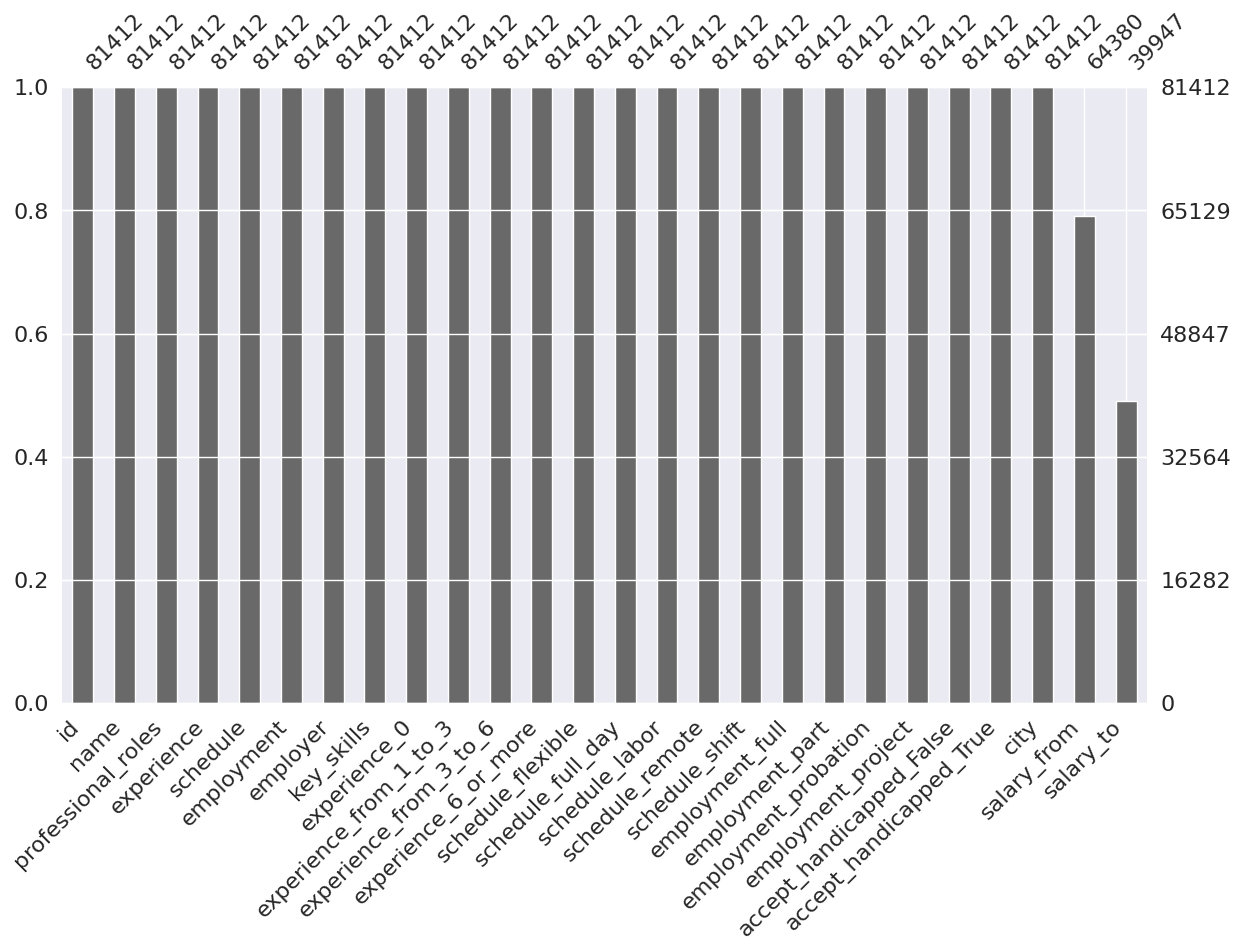

In [2406]:
sns.set()
msno.bar(dataset, figsize=(14, 8))
plt.show()

Построим матрицу пропущенных значений

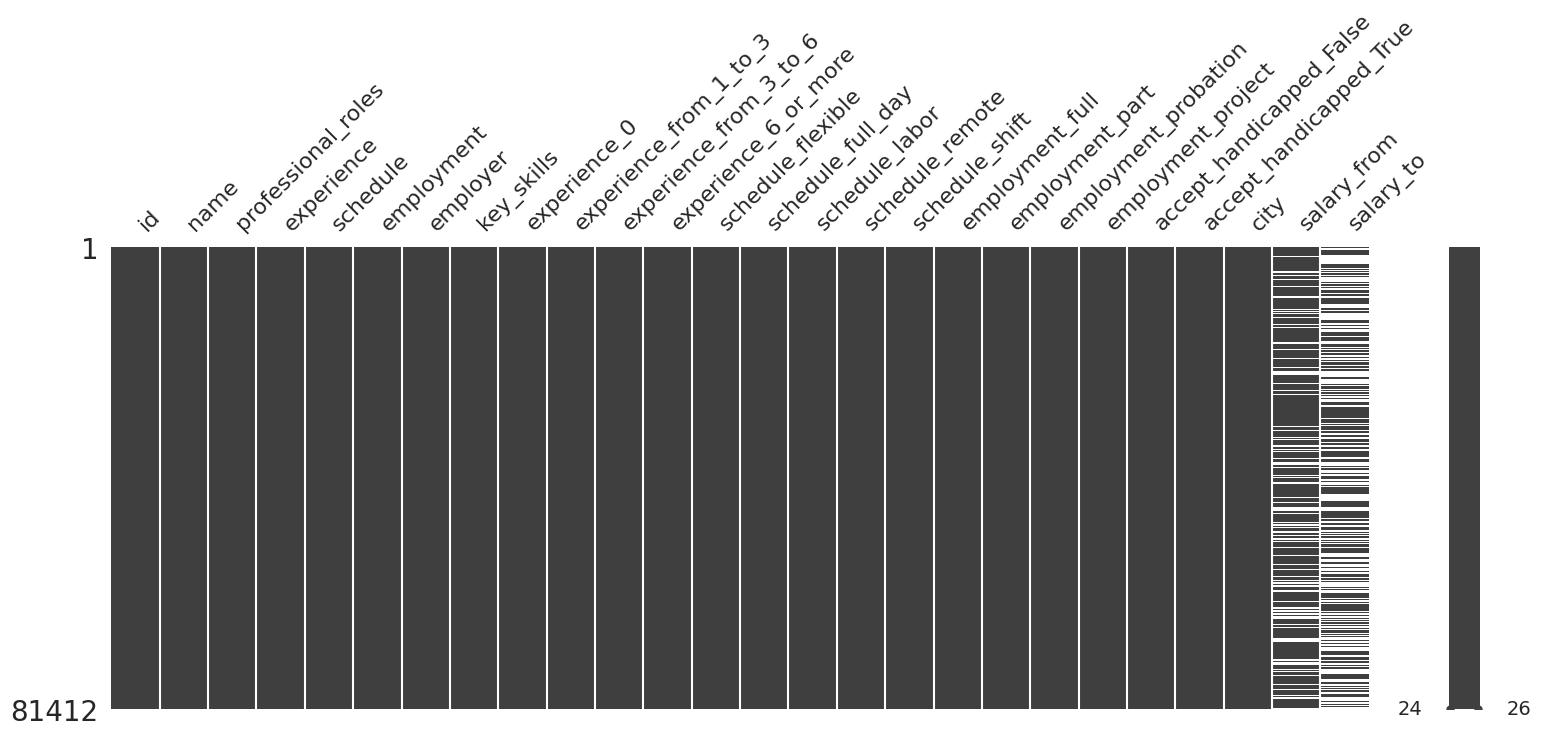

In [2407]:
msno.matrix(dataset, figsize=(18, 6))
plt.show()

Построим матрицу корреляций пропущенных значений

In [2408]:
dataset[[sign_1, sign_2]].isnull().corr()

,salary_from,salary_to
salary_from,1.00000,0.33238
salary_to,0.33238,1.00000


Отобразим матрицу корреляций

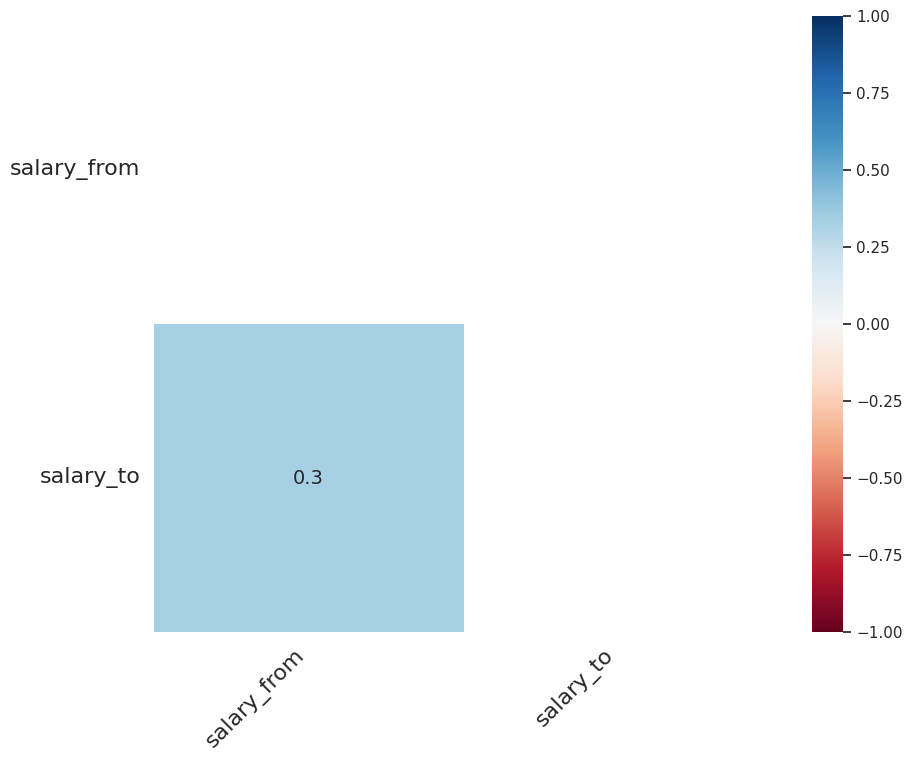

In [2409]:
msno.heatmap(dataset[[sign_1, sign_2]], figsize=(10, 8))
plt.show()

Для каждой профессии найдём медианную, среднюю, минимальную, максимальную зарплаты и количество наблюдений по ней

In [2410]:
statistics = dataset.groupby("professional_roles")[[sign_1, sign_2]].agg(['median', 'mean', 'min', 'max', 'count'])
statistics.head(30)

salary_from                 \
                                                        median           mean   
professional_roles                                                              
BI-аналитик, аналитик данных                           50000.0   71090.909091   
DevOps-инженер                                        300000.0       237500.0   
Event-менеджер                                         20000.0   27857.142857   
PR-менеджер                                            40000.0   46666.666667   
SMM-менеджер, контент-менеджер                         28000.0    30247.38676   
Автомойщик                                             40000.0    41728.15534   
Автослесарь, автомеханик                               50000.0   63438.169388   
Агент по недвижимости                                  55000.0   66501.466276   
Агроном                                                50000.0        55120.0   
Администратор                                          27000.0   28372.001953   
Администратор магазина, администратор торгового...     45000.0   48387.639881   
Аналитик                                               43000.0   64038.306452   
Андеррайтер                                            43000.0        41800.0   
Арт-директор, креативный директор                      42000.0   66076.923077   
Артист, актер, аниматор                                20000.0   35217.391304   
Архитектор                                             60000.0   56496.703297   
Ассистент врача                                        30000.0   31196.341463   
Аудитор                                                40000.0   38589.285714   
Бизнес-аналитик                                        30000.0        36900.0   
Бизнес-тренер                                          34500.0   42738.481013   
Брокер                                                 40000.0        40000.0   
Бухгалтер                                              37000.0   41064.308483   
Ветеринарный врач                                      60000.0   50070.731707   
Видеооператор, видеомонтажер                           45000.0   48255.813953   
Водитель                                               66600.0   78598.736739   
Военнослужащий                                         42500.0        42500.0   
Воспитатель, няня                                      23000.0   23222.863636   
Врач                                                   55000.0   65224.408163   
Гейм-дизайнер                                          60000.0        60000.0   
Генеральный директор, исполнительный директор (...    120000.0  139393.939394   

                                                                          \
                                                       min     max count   
professional_roles                                                         
BI-аналитик, аналитик данных                         18000  140000    11   
DevOps-инженер                                      150000  300000    24   
Event-менеджер                                       20000   40000    28   
PR-менеджер                                          25000   70000    57   
SMM-менеджер, контент-менеджер                        5000   80000   287   
Автомойщик                                           16000  100000   103   
Автослесарь, автомеханик                             20000  220000   490   
Агент по недвижимости                                20000  200000   341   
Агроном                                              25000  100000    50   
Администратор                                           15  120000  2048   
Администратор магазина, администратор торгового...   18000   80000   336   
Аналитик                                               500  300000   248   
Андеррайтер                                          40000   43000    10   
Арт-директор, креативный директор                    42000  120000    26   
Артист, актер, аниматор                              10000   60000    23   
Архитекто

Подготовим модели для заполнения пропусков по методу K-ближайших

In [2411]:
def prepare_knn_imputer(dataset: pd.DataFrame, target_column: str, n_neighbors: int = 5) -> KNNImputer:
    """
    Обучает KNN-импутер для заполнения пропусков в указанном столбце
    :param dataset: Исходный датафрейм с данными
    :param target_column: Название столбца, для которого обучается импутер
    :param n_neighbors: Количество соседей для KNN
    :return: Обученный импутер для указанного столбца
    """
    known_values = dataset[dataset[target_column].notna()][[target_column]]  # Берём только известные значения
    known_values = known_values.values.reshape(-1, 1)  # Преобразуем в 2D-массив (требование KNNImputer)
    imputer = KNNImputer(n_neighbors=n_neighbors)  # Создаём импутер
    imputer.fit(known_values)  # Обучаем на известных данных

    return imputer

knn_imputer_sign_1 = prepare_knn_imputer(dataset, sign_1)  # Для признака 1
knn_imputer_sign_2 = prepare_knn_imputer(dataset, sign_2)  # Для признака 2

Проведем сравнительный анализ распределения, сравнив датасеты с пропусками, заполненными медианными и средними значениями, а также с исходным датасетом, содержащим пропуски.

In [2412]:
# Создаем копии датасета для заполнения
dataset_by_median = dataset[['professional_roles', sign_1, sign_2]].copy()
dataset_by_mean = dataset[['professional_roles', sign_1, sign_2]].copy()

for role in dataset['professional_roles'].unique():
    # Маски для групп
    median_mask = dataset_by_median['professional_roles'] == role
    mean_mask = dataset_by_mean['professional_roles'] == role

    # Получение статистик из DataFrame statistics
    median_sign_1 = statistics.loc[role, (sign_1, 'median')] if role in statistics.index else np.nan
    median_sign_2 = statistics.loc[role, (sign_2, 'median')] if role in statistics.index else np.nan
    mean_sign_1 = statistics.loc[role, (sign_1, 'mean')] if role in statistics.index else np.nan
    mean_sign_2 = statistics.loc[role, (sign_2, 'mean')] if role in statistics.index else np.nan

    # Обработка для sign_1 (медиана)
    if pd.isna(median_sign_1):
        # Для KNN нужно передать 2D массив
        knn_value = knn_imputer_sign_1.transform([[np.nan]])[0][0]
        dataset_by_median.loc[median_mask, sign_1] = dataset_by_median.loc[median_mask, sign_1].fillna(int(knn_value))
    else:
        dataset_by_median.loc[median_mask, sign_1] = dataset_by_median.loc[median_mask, sign_1].fillna(int(median_sign_1))

    # Обработка для sign_2 (медиана)
    if pd.isna(median_sign_2):
        knn_value = knn_imputer_sign_2.transform([[np.nan]])[0][0]
        dataset_by_median.loc[median_mask, sign_2] = dataset_by_median.loc[median_mask, sign_2].fillna(int(knn_value))
    else:
        dataset_by_median.loc[median_mask, sign_2] = dataset_by_median.loc[median_mask, sign_2].fillna(int(median_sign_2))

    # Обработка для sign_1 (среднее)
    if pd.isna(mean_sign_1):
        knn_value = knn_imputer_sign_1.transform([[np.nan]])[0][0]
        dataset_by_mean.loc[mean_mask, sign_1] = dataset_by_mean.loc[mean_mask, sign_1].fillna(int(knn_value))
    else:
        dataset_by_mean.loc[mean_mask, sign_1] = dataset_by_mean.loc[mean_mask, sign_1].fillna(int(mean_sign_1))

    # Обработка для sign_2 (среднее)
    if pd.isna(mean_sign_2):
        knn_value = knn_imputer_sign_2.transform([[np.nan]])[0][0]
        dataset_by_mean.loc[mean_mask, sign_2] = dataset_by_mean.loc[mean_mask, sign_2].fillna(int(knn_value))
    else:
        dataset_by_mean.loc[mean_mask, sign_2] = dataset_by_mean.loc[mean_mask, sign_2].fillna(int(mean_sign_2))

Графический анализ по sign_1

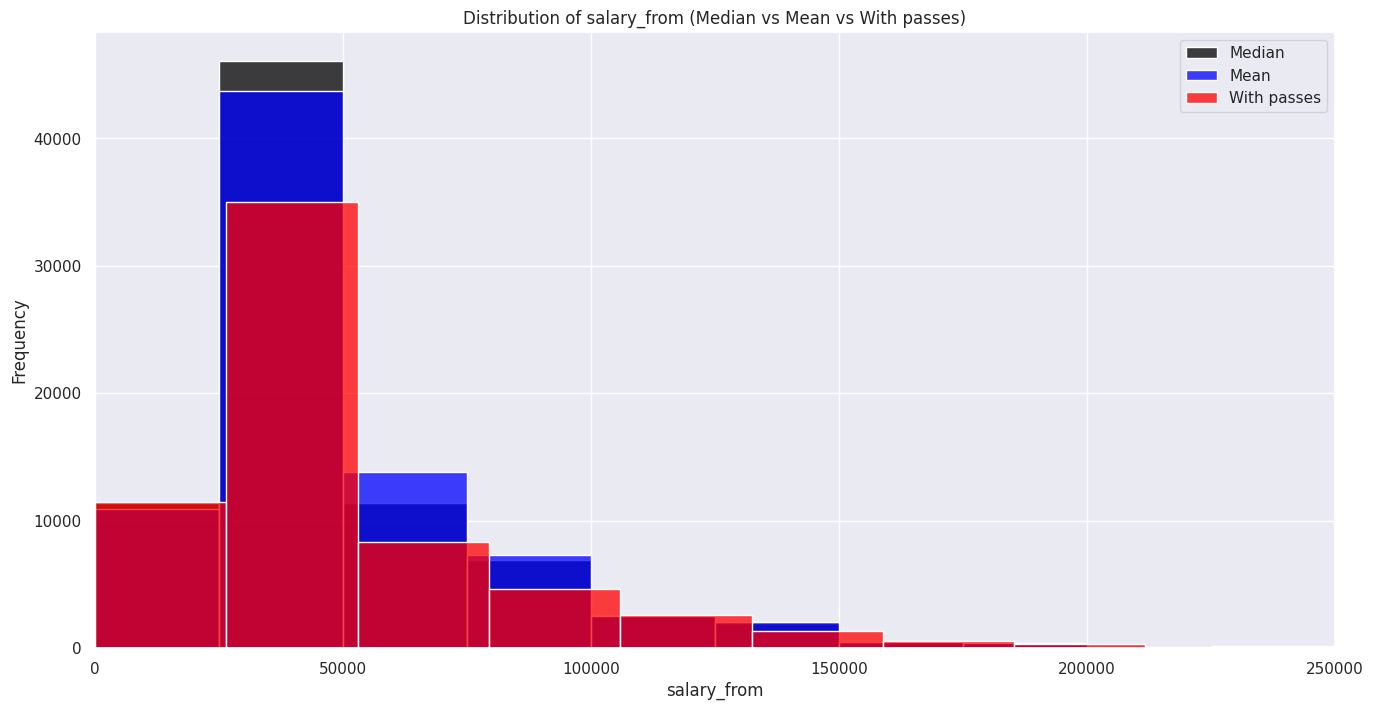

In [2413]:
plt.figure(figsize=(16, 8))
sns.histplot(dataset_by_median[sign_1], bins='sturges', color='black', label='Median', kde=False)
sns.histplot(dataset_by_mean[sign_1], bins='sturges', color='blue', label='Mean', kde=False)
sns.histplot(dataset[sign_1], bins='sturges', color='red', label='With passes', kde=False)
plt.xlim(0, 250000)
plt.xlabel(sign_1)
plt.ylabel('Frequency')
plt.title('Distribution of ' + sign_1 + ' (Median vs Mean vs With passes)')
plt.legend()
plt.show()

Графический анализ по sign_2

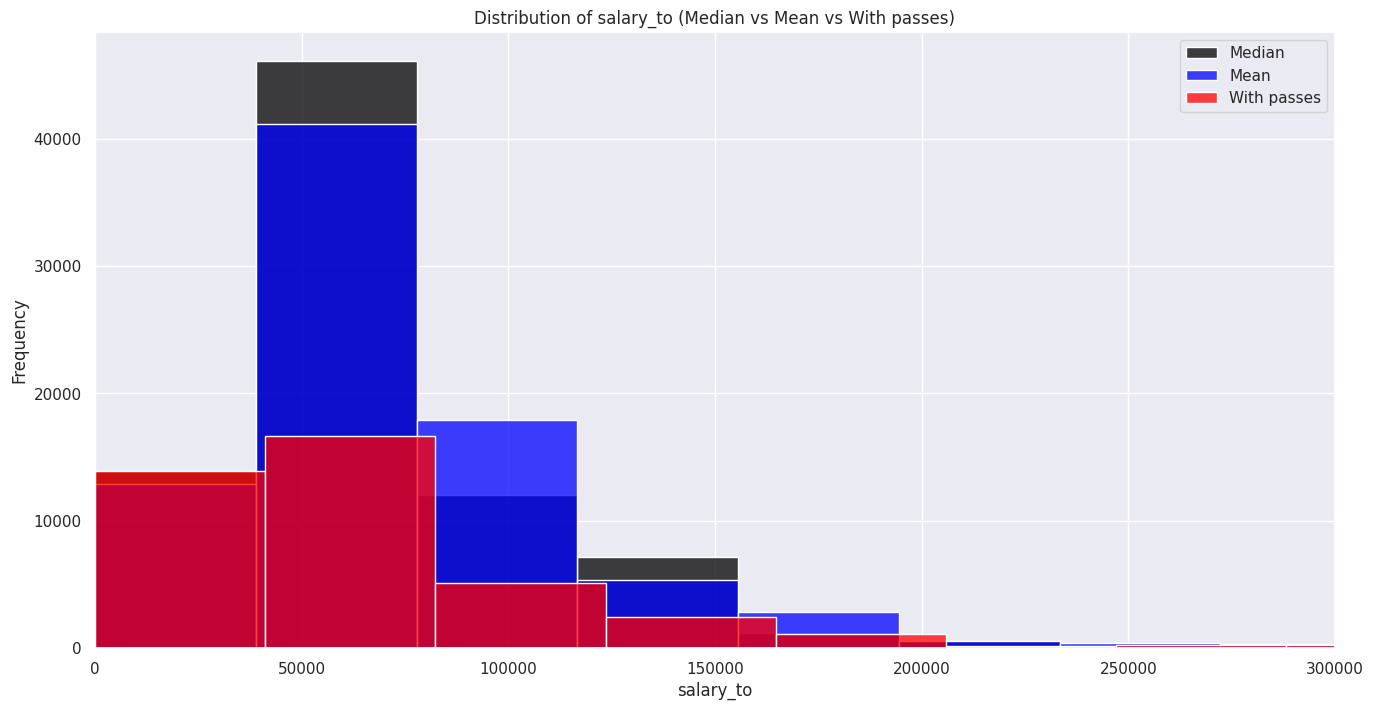

In [2414]:
plt.figure(figsize=(16, 8))
sns.histplot(dataset_by_median[sign_2], bins='sturges', color='black', label='Median', kde=False)
sns.histplot(dataset_by_mean[sign_2], bins='sturges', color='blue', label='Mean', kde=False)
sns.histplot(dataset[sign_2], bins='sturges', color='red', label='With passes', kde=False)
plt.xlim(0, 300000)
plt.xlabel(sign_2)
plt.ylabel('Frequency')
plt.title('Distribution of ' + sign_2 + ' (Median vs Mean vs With passes)')
plt.legend()
plt.show()

Заполним с помощью среднего пропуски по минимальной ЗП и максимальной ЗП

In [2415]:
dataset[[sign_1, sign_2]] = dataset_by_mean[[sign_1, sign_2]].copy()

Посмотрим нет ли наблюдений в которых минимальная зарплата больше, чем максимальная

In [2416]:
dataset[dataset[sign_1] > dataset[sign_2]][[sign_1, sign_2]]

,salary_from,salary_to
115,90000,53591
116,90000,53591
117,90000,53591
192,105000,60702
193,105000,60702
...,...,...
81381,51469,50369
81382,51469,50369
81383,51469,50369
81384,51469,50369


Поменяем местами, если есть такие строки

In [2417]:
mask = dataset[sign_1] > dataset[sign_2]
dataset.loc[mask, [sign_1, sign_2]] = dataset.loc[mask, [sign_2, sign_1]].values

Проверим нет ли теперь наблюдений в которых минимальная зарплата больше, чем максимальная

In [2418]:
dataset[dataset[sign_1] > dataset[sign_2]][[sign_1, sign_2]]

,salary_from,salary_to


Посмотрим информацию о датасете

In [2419]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   experience_0              81412 non-null  category
 9   experience_from_1_to_3    81412 non-null  category
 10  experience_from_3_to_6    81412 non-null  category
 11  experience_6_or_more      81412 non-null  category
 12  schedule_flexible         81412 non-null  category
 13  schedule_full_day         81412 non-null  cate

Удалим ненужные переменные

In [2420]:
del dataset_by_mean
del dataset_by_median
del statistics
del knn_imputer_sign_1
del knn_imputer_sign_2
del sign_1
del sign_2
del median_mask
del median_sign_1
del median_sign_2
del mean_mask
del mean_sign_1
del mean_sign_2
del mask

**Выводы по обработке признака**:

  * В признаках salary_from и salary_to обнаружены пропущенные значения

  * Матрица пропущенных значений и тепловая карта корреляции показали, что пропуски в этих признаках могут быть слабо связаны между собой

  * Для каждой профессии (professional_roles) были рассчитаны медианные, средние, минимальные, максимальные значения и количество наблюдений

  * Это позволило заполнить пропуски на основе групповых статистик, что является более точным, чем общее среднее или медиана по всему датасету

  * KNN Imputer: Для профессий, по которым не было достаточных данных, применялся метод ближайших соседей

  * Обнаружены и исправлены строки, где salary_from (минимальная зарплата) была больше salary_to (максимальной зарплаты). В таких случаях значения были поменяны местами

  * После обработки аномальных строк не осталось


## 5. Датасет после предобработки. Признаки, которые будут использованы для дальнейшего анализа:

Количественные признаки:
  
  - идентификатор вакансии (id)

  - минимальная заработная плат (salary_from)
  
  - максимальная заработная плата (salary_to)

Категориальные признаки:

  - наименование вакансии (name)

  - профессиональная роль (professional roles)

  - ключевые навыки (key_skills)

  - наименование работодателя (employer)

  - опыт работы (experience)

  - график работы (schedule)

  - тип занятости (employment)

  - доступна ли вакансия для соискателей с инвалидностью (accept_handicapped)

  - нулевой опыт работы (experience_0)

  - опыт работы от 1 до 3 лёт (experience_from_1_to_3)

  - опыт работы от 3 до 6 лёт (experience_from_3_to_6)

  - опыт работы 6 и более (experience_6_or_more)

  - график работы – полный день (schedule_full_day)

  - график работы – удаленная работа (schedule_remote)

  - график работы – гибкий график (schedule_flexible)

  - график работы – сменный график (schedule_shift)
  
  - график работы – вахтовый метод (schedule_labor)

  - тип занятости – полная занятость (employment_full)
  
  - тип занятости – частичная занятость (employment_part)
  
  - тип занятости – проектная работа (employment_project)
  
  - тип занятости - стажировка (employment_probation)

  - доступна ли вакансия для соискателей с инвалидностью - да (accept_handicapped_True)

  - доступна ли вакансия для соискателей с инвалидностью - нет (accept_handicapped_False)

  - город (city)

Посмотрим на размеры датасета

In [2421]:
dataset.shape

(81412, 26)

Посмотрим информацию о датасете

In [2422]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        81412 non-null  int64   
 1   name                      81412 non-null  string  
 2   professional_roles        81412 non-null  string  
 3   experience                81412 non-null  category
 4   schedule                  81412 non-null  category
 5   employment                81412 non-null  category
 6   employer                  81412 non-null  string  
 7   key_skills                81412 non-null  string  
 8   experience_0              81412 non-null  category
 9   experience_from_1_to_3    81412 non-null  category
 10  experience_from_3_to_6    81412 non-null  category
 11  experience_6_or_more      81412 non-null  category
 12  schedule_flexible         81412 non-null  category
 13  schedule_full_day         81412 non-null  cate

Посмотрим количество пропусков в датасете

In [2423]:
dataset.isnull().sum()

,0
id,0
name,0
professional_roles,0
experience,0
schedule,0
employment,0
employer,0
key_skills,0
experience_0,0
experience_from_1_to_3,0


## 6. Неграфический и графический анализ количественных признаков

### 6.1 Признаки salary_from и salary_to

Сохраним признак в переменную sign

In [2424]:
sign_1 = 'salary_from'
sign_2 = 'salary_to'

Рассчитаем минимальное и максимальное значение признака

In [2425]:
min_value_sign_1 = dataset[sign_1].min()
max_value_sign_1 =  dataset[sign_1].max()
min_value_sign_2 = dataset[sign_2].min()
max_value_sign_2 =  dataset[sign_2].max()
print(f'Минимум {sign_1}: {min_value_sign_1}')
print(f'Максимум {sign_1}: {max_value_sign_1}')
print(f'Минимум {sign_2}: {min_value_sign_2}')
print(f'Максимум {sign_2}: {max_value_sign_2}')

Минимум salary_from: 15
Максимум salary_from: 350000
Минимум salary_to: 25
Максимум salary_to: 700000


Рассчитаем среднее значение признака

In [2426]:
mean_value_sign_1 =  dataset[sign_1].mean()
mean_value_sign_2 =  dataset[sign_2].mean()
print(f'Среднее {sign_1}: {mean_value_sign_1}')
print(f'Среднее {sign_2}: {mean_value_sign_2}')

Среднее salary_from: 49353.487520267285
Среднее salary_to: 73640.11954011694


Рассчитаем медианное значение признака

In [2427]:
median_value_sign_1 = dataset[sign_1].median()
median_value_sign_2 = dataset[sign_2].median()
print(f'Медиана {sign_1}: {median_value_sign_1}')
print(f'Медиана {sign_2}: {median_value_sign_2}')

Медиана salary_from: 40718.0
Медиана salary_to: 61829.0


Рассчитаем процентили 10, 25, 50, 75, 90

In [2428]:
percentile_10_value_sign_1 = dataset[sign_1].quantile(0.10)
percentile_25_value_sign_1 = dataset[sign_1].quantile(0.25)
percentile_50_value_sign_1 = dataset[sign_1].quantile(0.50)
percentile_75_value_sign_1 = dataset[sign_1].quantile(0.75)
percentile_90_value_sign_1 = dataset[sign_1].quantile(0.90)

percentile_10_value_sign_2 = dataset[sign_2].quantile(0.10)
percentile_25_value_sign_2 = dataset[sign_2].quantile(0.25)
percentile_50_value_sign_2 = dataset[sign_2].quantile(0.50)
percentile_75_value_sign_2 = dataset[sign_2].quantile(0.75)
percentile_90_value_sign_2 = dataset[sign_2].quantile(0.90)

print(f'10-й процентиль {sign_1}: {percentile_10_value_sign_1}')
print(f'25-й процентиль {sign_1}: {percentile_25_value_sign_1}')
print(f'50-й процентиль {sign_1}: {percentile_50_value_sign_1}')
print(f'75-й процентиль {sign_1}: {percentile_75_value_sign_1}')
print(f'90-й процентиль {sign_1}: {percentile_90_value_sign_1}')

print(f'10-й процентиль {sign_2}: {percentile_10_value_sign_2}')
print(f'25-й процентиль {sign_2}: {percentile_25_value_sign_2}')
print(f'50-й процентиль {sign_2}: {percentile_50_value_sign_2}')
print(f'75-й процентиль {sign_2}: {percentile_75_value_sign_2}')
print(f'90-й процентиль {sign_2}: {percentile_90_value_sign_2}')

10-й процентиль salary_from: 25000.0
25-й процентиль salary_from: 30000.0
50-й процентиль salary_from: 40718.0
75-й процентиль salary_from: 60000.0
90-й процентиль salary_from: 89624.0
10-й процентиль salary_to: 35000.0
25-й процентиль salary_to: 45000.0
50-й процентиль salary_to: 61829.0
75-й процентиль salary_to: 90000.0
90-й процентиль salary_to: 133305.0


Посмотрим значение описательной статистики

In [2429]:
pd.DataFrame([dataset[sign_1].describe(), dataset[sign_2].describe()])

,count,mean,std,min,25%,50%,75%,max
salary_from,81412.0,49353.48752,28375.253712,15.0,30000.0,40718.0,60000.0,350000.0
salary_to,81412.0,73640.11954,44078.879765,25.0,45000.0,61829.0,90000.0,700000.0


Построим диаграмму "ящик с усами" для признака

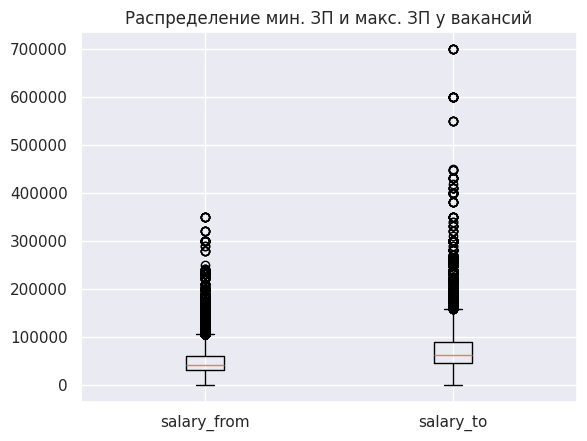

In [2430]:
plt.boxplot(dataset[[sign_1, sign_2]], tick_labels=[sign_1, sign_2])
plt.title('Распределение мин. ЗП и макс. ЗП у вакансий')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

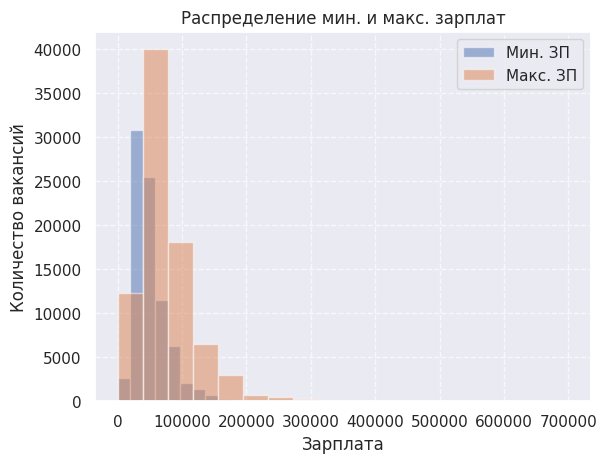

In [2431]:
plt.hist(dataset[sign_1], bins='sturges', alpha=0.5, label='Мин. ЗП')
plt.hist(dataset[sign_2], bins='sturges', alpha=0.5, label='Макс. ЗП')

plt.title('Распределение мин. и макс. зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')
plt.legend()  # Показываем легенду с метками
plt.grid(True, linestyle='--', alpha=0.7)  # Сетка для удобства
plt.show()

Поосмотрим на коэффициент асимметрии

In [2432]:
print(f"Коэффициент асимметрии {sign_1}: {stats.skew(dataset[sign_1])}")
print(f"Коэффициент асимметрии {sign_2}: {stats.skew(dataset[sign_2])}")

Коэффициент асимметрии salary_from: 2.2349798770486733
Коэффициент асимметрии salary_to: 2.4418728238636023


Посмотрим на значения у которых минимальная или максимальная ЗП меньше 100

In [2433]:
dataset[(dataset[sign_1] < 100) | (dataset[sign_2] < 100)][['professional_roles', sign_1, sign_2]]

,professional_roles,salary_from,salary_to
2307,Другое,35,50
5944,"Инженер-конструктор, инженер-проектировщик",50,69
5945,"Инженер-конструктор, инженер-проектировщик",50,69
14931,Экономист,65,80
14932,Экономист,65,80
...,...,...,...
76135,Водитель,40,55000
76136,Водитель,40,55000
76137,Водитель,40,55000
76138,Водитель,40,55000


Посмотрим на значения у которых минимальная или максимальная ЗП меньше 1000, но больше 99

In [2434]:
dataset[
    ((dataset[sign_1] < 1000) & (dataset[sign_1] >= 100)) |
    ((dataset[sign_2] < 1000) & (dataset[sign_2] >= 100))
][['professional_roles', sign_1, sign_2]]

,professional_roles,salary_from,salary_to
3634,Аналитик,500,97812
3635,Аналитик,500,97812
3636,Аналитик,500,97812
4826,"Менеджер по продажам, менеджер по работе с кли...",100,84520
4827,"Менеджер по продажам, менеджер по работе с кли...",100,84520
...,...,...,...
65069,Руководитель проектов,100,92771
65070,Руководитель проектов,100,92771
65071,Руководитель проектов,100,92771
65072,Руководитель проектов,100,92771


Посмотрим на значения у которых минимальная или максимальная ЗП меньше 10000, но больше 999

In [2435]:
dataset[
    ((dataset[sign_1] < 10000) & (dataset[sign_1] >= 1000)) |
    ((dataset[sign_2] < 10000) & (dataset[sign_2] >= 1000))
][['professional_roles', sign_1, sign_2]]

,professional_roles,salary_from,salary_to
307,"Упаковщик, комплектовщик",1700,47937
308,"Упаковщик, комплектовщик",1700,47937
516,"Учитель, преподаватель, педагог",8000,45000
517,"Учитель, преподаватель, педагог",8000,45000
518,"Учитель, преподаватель, педагог",8000,45000
...,...,...,...
81371,"Продавец-консультант, продавец-кассир",5000,8000
81372,"Продавец-консультант, продавец-кассир",5000,8000
81373,"Продавец-консультант, продавец-кассир",5000,8000
81374,"Продавец-консультант, продавец-кассир",5000,8000


Домножим все значения меньшие 100 на 1000

In [2436]:
dataset.loc[dataset[sign_1] < 100, sign_1] *= 1000
dataset.loc[dataset[sign_2] < 100, sign_2] *= 1000

Домножим все значения меньшие 1000 на 100

In [2437]:
dataset.loc[dataset[sign_1] < 1000, sign_1] *= 100
dataset.loc[dataset[sign_2] < 1000, sign_2] *= 100

Домножим все значения меньшие 10000 на 10

In [2438]:
dataset.loc[dataset[sign_1] < 10000, sign_1] *= 10
dataset.loc[dataset[sign_2] < 10000, sign_2] *= 10

Проверим отсутствие значение у которых минимальная ЗП меньше 10000

In [2439]:
dataset[(dataset[sign_1] < 10000) | (dataset[sign_2] < 10000)]

,id,name,professional_roles,experience,schedule,employment,employer,key_skills,experience_0,experience_from_1_to_3,...,schedule_shift,employment_full,employment_part,employment_probation,employment_project,accept_handicapped_False,accept_handicapped_True,city,salary_from,salary_to


Посмотрим нет ли наблюдений в которых минимальная зарплата больше, чем максимальная

In [2440]:
dataset[dataset[sign_1] > dataset[sign_2]][[sign_1, sign_2]]

,salary_from,salary_to
516,80000,45000
517,80000,45000
518,80000,45000
519,80000,45000
520,80000,45000
...,...,...
78244,90000,27072
78245,90000,27072
78246,90000,27072
78247,90000,27072


Поменяем местами, если есть такие строки

In [2441]:
mask = dataset[sign_1] > dataset[sign_2]
dataset.loc[mask, [sign_1, sign_2]] = dataset.loc[mask, [sign_2, sign_1]].values

Проверим нет ли теперь наблюдений в которых минимальная зарплата больше, чем максимальная

In [2442]:
dataset[dataset[sign_1] > dataset[sign_2]][[sign_1, sign_2]]

,salary_from,salary_to


Рассчитаем процентили 10, 25, 50, 75, 90

In [2443]:
percentile_10_value_sign_1 = dataset[sign_1].quantile(0.10)
percentile_25_value_sign_1 = dataset[sign_1].quantile(0.25)
percentile_50_value_sign_1 = dataset[sign_1].quantile(0.50)
percentile_75_value_sign_1 = dataset[sign_1].quantile(0.75)
percentile_90_value_sign_1 = dataset[sign_1].quantile(0.90)

percentile_10_value_sign_2 = dataset[sign_2].quantile(0.10)
percentile_25_value_sign_2 = dataset[sign_2].quantile(0.25)
percentile_50_value_sign_2 = dataset[sign_2].quantile(0.50)
percentile_75_value_sign_2 = dataset[sign_2].quantile(0.75)
percentile_90_value_sign_2 = dataset[sign_2].quantile(0.90)

print(f'10-й процентиль {sign_1}: {percentile_10_value_sign_1}')
print(f'25-й процентиль {sign_1}: {percentile_25_value_sign_1}')
print(f'50-й процентиль {sign_1}: {percentile_50_value_sign_1}')
print(f'75-й процентиль {sign_1}: {percentile_75_value_sign_1}')
print(f'90-й процентиль {sign_1}: {percentile_90_value_sign_1}')

print(f'10-й процентиль {sign_2}: {percentile_10_value_sign_2}')
print(f'25-й процентиль {sign_2}: {percentile_25_value_sign_2}')
print(f'50-й процентиль {sign_2}: {percentile_50_value_sign_2}')
print(f'75-й процентиль {sign_2}: {percentile_75_value_sign_2}')
print(f'90-й процентиль {sign_2}: {percentile_90_value_sign_2}')

10-й процентиль salary_from: 25000.0
25-й процентиль salary_from: 30000.0
50-й процентиль salary_from: 41000.0
75-й процентиль salary_from: 60000.0
90-й процентиль salary_from: 89624.0
10-й процентиль salary_to: 35000.0
25-й процентиль salary_to: 45000.0
50-й процентиль salary_to: 61829.0
75-й процентиль salary_to: 90000.0
90-й процентиль salary_to: 133305.0


Посмотрим значение описательной статистики

In [2444]:
pd.DataFrame([dataset[sign_1].describe(), dataset[sign_2].describe()])

,count,mean,std,min,25%,50%,75%,max
salary_from,81412.0,49477.776004,28252.313001,10000.0,30000.0,41000.0,60000.0,350000.0
salary_to,81412.0,73773.182835,43973.324128,10000.0,45000.0,61829.0,90000.0,700000.0


Посмотрим сколько значений по признакам sign_1 и sign_2 больше своих 90-ых процентилей

In [2445]:
dataset[(dataset[sign_1] > dataset[sign_1].quantile(0.95)) | (dataset[sign_2] > dataset[sign_2].quantile(0.95))][['professional_roles', sign_1, sign_2]]

,professional_roles,salary_from,salary_to
200,Коммерческий директор (CCO),123554,264687
201,Коммерческий директор (CCO),123554,264687
202,Коммерческий директор (CCO),123554,264687
203,Коммерческий директор (CCO),123554,264687
215,Сварщик,160000,160000
...,...,...,...
81001,"Менеджер по продажам, менеджер по работе с кли...",50000,200000
81002,"Менеджер по продажам, менеджер по работе с кли...",50000,200000
81003,"Менеджер по продажам, менеджер по работе с кли...",50000,200000
81404,Менеджер по закупкам,120000,135000


Построим диаграмму "ящик с усами" для признака

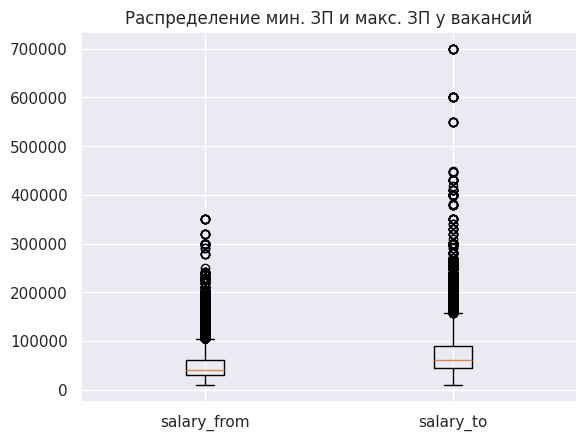

In [2446]:
plt.boxplot(dataset[[sign_1, sign_2]], tick_labels=[sign_1, sign_2])
plt.title('Распределение мин. ЗП и макс. ЗП у вакансий')
plt.show()

Построим гисторграмму для признака по формуле Стёрджеса

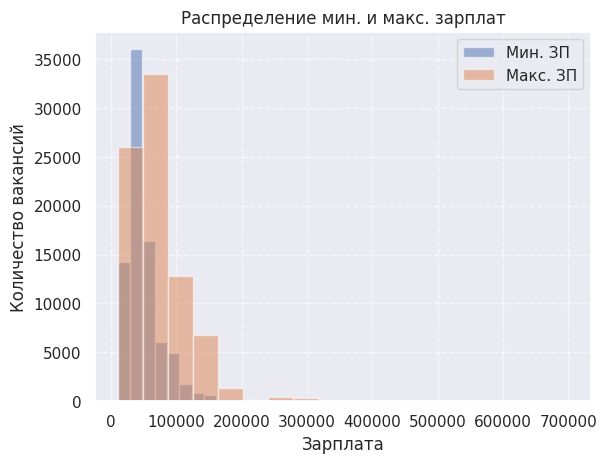

In [2447]:
plt.hist(dataset[sign_1], bins='sturges', alpha=0.5, label='Мин. ЗП')
plt.hist(dataset[sign_2], bins='sturges', alpha=0.5, label='Макс. ЗП')

plt.title('Распределение мин. и макс. зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')
plt.legend()  # Показываем легенду с метками
plt.grid(True, linestyle='--', alpha=0.7)  # Сетка для удобства
plt.show()

Поосмотрим на коэффициент асимметрии

In [2448]:
print(f"Коэффициент асимметрии {sign_1}: {stats.skew(dataset[sign_1])}")
print(f"Коэффициент асимметрии {sign_2}: {stats.skew(dataset[sign_2])}")

Коэффициент асимметрии salary_from: 2.267799511899197
Коэффициент асимметрии salary_to: 2.4582691554209752


Выводы по анализу признака:

  * О максимальных и минимальных значениях признака (размах значений)

    - salary_from: min = 10000, max = 350000

    - salary_to: min = 10000, max = 700000

    - Размах значений очень большой, что указывает на значительные различия в зарплатных предложениях.
  
  * О нулевых значениях (их наличие, нужна ли предобработка)
  
    - Нулевые значения отсутствуют

    - Разница между средним и медианой говорит о наличии выбросов или асимметрии в распределении.

  * О средних величинах (среднее, медиана, их отличия, возможные причины)

    - Среднее salary_from: 49477.776004

    - Среднее salary_to: 	73773.182835

    - Медиана salary_from: 41000

    - Медиана salary_to: 61829

    - Разница между средним и медианой говорит о наличии выбросов или асимметрии в распределении.

  * О процентилях (сколько процентов данных не превышают то или иное значение)

    - 10-й процентиль salary_from: 25000.0

    - 25-й процентиль salary_from: 30000.0

    - 50-й процентиль salary_from: 41000.0

    - 75-й процентиль salary_from: 60000.0

    - 90-й процентиль salary_from: 89624.0

    - 10-й процентиль salary_to: 35000.0

    - 25-й процентиль salary_to: 45000.0

    - 50-й процентиль salary_to: 61829.0

    - 75-й процентиль salary_to: 90000.0

    - 90-й процентиль salary_to: 133305.0

  * О результатах графического анализа (что показывает "ящик с усами", что показывает гистограмма)

    - Ящик с усами (boxplot):

      - Видны аномально высокие зарплаты (выбросы).

    - Гистограмма:

      - Распределение зарплат скошено вправо salary_from(положительная асимметрия)

      - Распределение зарплат скошено вправо salary_to(положительная асимметрия).

      - Большая часть данных salary_from сосредоточена в левой части графика.

      - Большая часть данных salary_to сосредоточена в левой части графика.

    - Коэффициент асимметрии:

      - Для salary_from: 2.267799511899197

      - Для salary_to: 2.4582691554209752

## 7 Неграфический и графический анализ категориальных признаков

Зададим базовые цвета для отображения топ 5 категорий для анализа признаков

In [2449]:
colors = ('#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7')

Зададим свойства секторов (долей) круговой диаграммы

In [2450]:
wedgeprops = {'linewidth': 1.5, 'edgecolor': 'white'}

Зададим свойства текста круговой диаграммы

In [2451]:
textprops={'fontsize': 12}

### 7.1 Признак name

Сохраним имя признака в переменную sign

In [2452]:
sign = 'name'

Оценим описательные статистики признака

In [2453]:
dataset[sign].describe()

,name
count,81412
unique,10207
top,Продавец-консультант
freq,870


Изучим уникальные значения признака

In [2454]:
dataset[sign].unique()

<StringArray>
['Инженер-конструктор (в г. Электрогорск, Московская обл.)',
                      'Специалист по доставке (Подработка)',
         'Удаленный оператор ПК / сотрудник на ввод данных',
                                      'Повар линии раздачи',
                   'Повар в магазин SPAR (ул.Киевская 139)',
                                           'Дефектоскопист',
                                       'Водитель-кладовщик',
                                            'Электромонтер',
                                     'Менеджер по продажам',
             'Ведущий специалист обработки корреспонденции',
 ...
                                   'Кладовщик в мясной цех',
       'Преподаватель по дисциплине «Техническая механика»',
                                     'Менеджер по качеству',
                               'Support-инженер (L2, Кипр)',
         'Медицинская сестра (медицинский брат) по массажу',
           'Специалист виртуального call-центра (удаленно)',
     

Проведём неграфический структурный анализ

In [2455]:
dataset[sign].value_counts()

,count
name,
Продавец-консультант,870
Менеджер по продажам,784
Менеджер по работе с клиентами,609
Бухгалтер,607
Водитель категории С,584
...,...
Фотограф рекламы (подработка),1
Специалист по развитию продаж добровольных видов и ипотечного страхования,1
Сварщик (Иркутская область),1


Сохраним результаты работы метода value_counts() в переменную value_counts, отсортировав значения

In [2456]:
value_counts = dataset[sign].value_counts().sort_values(ascending=False)
value_counts.head(30)

,count
name,
Продавец-консультант,870
Менеджер по продажам,784
Менеджер по работе с клиентами,609
Бухгалтер,607
Водитель категории С,584
Кладовщик,507
Инженер ПТО,449
Главный бухгалтер,377
Торговый представитель,369


Сохраним 5 самых часто встречающихся значений в переменную top_5_most_frequent

In [2457]:
top_5_most_frequent = value_counts[:5]
top_5_most_frequent

,count
name,
Продавец-консультант,870
Менеджер по продажам,784
Менеджер по работе с клиентами,609
Бухгалтер,607
Водитель категории С,584


Визуализируeм распределение 40 самых часто встречаемых значений категориального признака в виде гистограммы

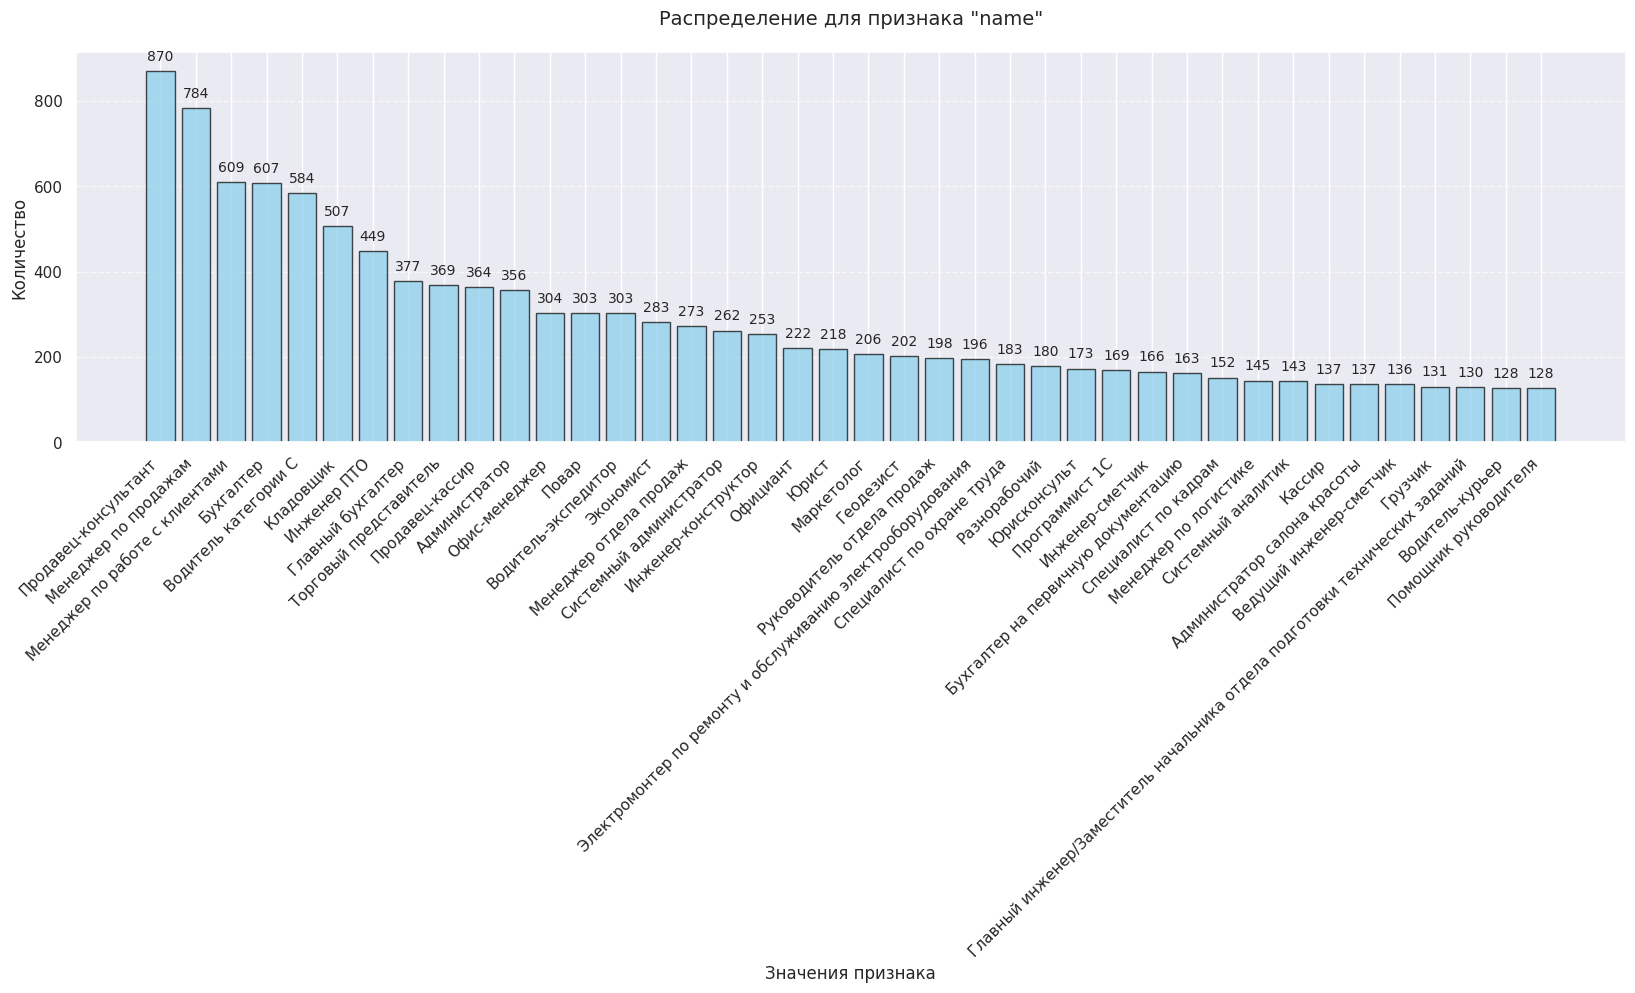

In [2458]:
# Создаем фигуру и оси размером 24x8 дюймов
plt.figure(figsize=(20, 6))

# Строим столбчатую диаграмму (гистограмму)
bars = plt.bar(value_counts[:40].index,           # Категории по оси X (значения признака)
               value_counts[:40].values,          # Высота столбцов (количество каждого значения)
               color='skyblue',                   # Цвет столбцов
               edgecolor='black',                 # Цвет границ столбцов
               alpha=0.7,                         # Прозрачность (0-1)
)

# Добавляем подписи значений сверху каждого столбца
for bar in bars:
    height = bar.get_height()                    # Получаем высоту текущего столбца
    plt.text(bar.get_x() + bar.get_width() / 2,  # Позиция X (по центру столбца)
             height + 0.02 * max(value_counts[:40]),  # Позиция Y (немного выше вершины столбца)
             f'{height:,}',                      # Форматированное число (с разделителями тысяч)
             ha='center',                        # Горизонтальное выравнивание по центру
             va='bottom',                        # Вертикальное выравнивание по низу
             fontsize=10                         # Размер шрифта
    )

# Настройка осей и заголовка
plt.title(f'Распределение для признака "{sign}"',  # Заголовок с именем признака
          fontsize=14,                             # Размер шрифта заголовка
          pad=20                                   # Отступ заголовка от графика
)
plt.xlabel('Значения признака', fontsize=12)       # Подпись оси X
plt.ylabel('Количество', fontsize=12)              # Подпись оси Y
plt.xticks(rotation=45, ha='right')                # Поворот подписей X на 45 градусов с выравниванием вправо
plt.grid(axis='y', linestyle='--', alpha=0.7)      # Сетка только по оси Y (пунктирная, полупрозрачная)

plt.subplots_adjust(bottom=0.25, top=0.9)  # Регулируем нижний и верхний отступ

# Отображение графика
plt.show()

Визуализируем распределение топ пяти значений категориального признака в виде круговой диаграммы с вынесенными значениями в легенду.

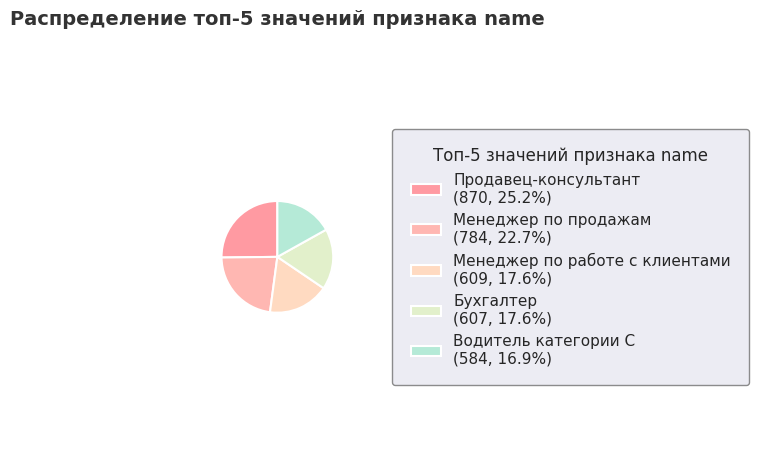

In [2459]:
# Создаем круговую диаграмму и получаем 3 набора объектов:
# patches - сектора диаграммы, texts - текстовые элементы (здесь пустые), autotexts - проценты (здесь пустые)
patches, texts, autotexts = plt.pie(
    top_5_most_frequent,  # Данные для отображения (топ-5 частых значений)
    labels=None,          # Не показываем стандартные подписи (будем использовать легенду)
    autopct='',           # Не показываем проценты внутри секторов (добавим в легенду)
    startangle=90,        # Начальный угол поворота (90° = начало сверху)
    colors=colors,        # Цвета для секторов
    wedgeprops=wedgeprops, # Свойства секторов (границы и т.д.)
    textprops=textprops   # Свойства текста (размер шрифта)
)

# Рассчитываем общее количество (для вычисления процентов)
total = top_5_most_frequent.sum()

# Создаем список процентных соотношений с форматированием (1 знак после запятой)
percentages = [f'{(count/total)*100:.1f}%' for count in top_5_most_frequent.values]

# Формируем подписи для легенды в формате:
# Название категории
# (Абсолютное значение, Процентное соотношение)
legend_labels = [
    f'{label}\n({count}, {percent})'  # \n - перенос строки
    for label, count, percent in zip(
        top_5_most_frequent.index,    # Названия категорий
        top_5_most_frequent.values,   # Абсолютные значения
        percentages                   # Процентные соотношения
    )
]

# Создаем легенду с кастомными подписями
legend = plt.legend(patches,                                               # Сектора диаграммы (для отображения цветных маркеров)
                    legend_labels,                                         # Сформированные подписи
                    title=f"Топ-5 значений признака {sign}",      # Заголовок легенды
                    loc="center left",                                     # Позиционирование относительно диаграммы
                    bbox_to_anchor=(1.15, 0.5),                            # Смещение легенды (вправо на 15% от ширины)
                    fontsize=11,                                           # Размер шрифта подписей
                    title_fontsize=12,                                     # Размер шрифта заголовка
                    framealpha=0.9,                                        # Прозрачность фона легенды
                    edgecolor='gray',                                      # Цвет границы легенды
                    borderpad=1.2                                          # Отступ внутри легенды
)

# Добавляем заголовок диаграммы
plt.title(
    f'Распределение топ-5 значений признака {sign}',   # Текст заголовка
    pad=25,                                            # Отступ от верха диаграммы
    fontsize=14,                                       # Размер шрифта
    fontweight='bold',                                 # Жирное начертание
    color='#333333'                                    # Цвет текста (темно-серый)
)

# Делаем диаграмму идеально круглой (без искажений)
plt.axis('equal')

# Автоматически регулируем отступы для предотвращения обрезания элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Выводы по анализу признака:

  * О количестве уникальных значений признака:

    - 10207 значений

  * О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось):

    - значение признака "Продавец-консультант" встретилось 870 раз

  * О распределении значений признака (наиболее встречаемые, наименее встречаемые):

    - Наиболее встречаемые:
      
      - Продавец-консультант: 870

      - Менеджер по продажам:	784

      - Менеджер по работе с клиентами:	609

      - Бухгалтер:	607

      - Водитель категории С:	584
    
    - Наименее встречаемые:

      - Фотограф рекламы (подработка):	1

      - Специалист по развитию продаж добровольных видов и ипотечного страхования:	1

      - Сварщик (Иркутская область):	1

      - Сборщик дверей:	1

      - Водитель кран-борт:	1

  * О результатах графического анализа определенного топ признака (что показывает круговая диаграмма):

      - Продавец-консультант: 870, 25.2%

      - Менеджер по продажам:	784, 22.7%

      - Менеджер по работе с клиентами:	609, 17.6%

      - Бухгалтер:	607, 17.6%

      - Водитель категории С:	584, 16.9%

### 7.2 Признак professional_roles

Сохраним имя признака в переменную sign

In [2460]:
sign = 'professional_roles'

Оценим описательные статистики признака

In [2461]:
dataset[sign].describe()

,professional_roles
count,81412
unique,171
top,Другое
freq,7302


Изучим уникальные значения признака

In [2462]:
dataset[sign].unique()

<StringArray>
[          'Инженер-конструктор, инженер-проектировщик',
                                               'Курьер',
 'Менеджер по продажам, менеджер по работе с клиентами',
                            'Официант, бармен, бариста',
                              'Повар, пекарь, кондитер',
                                             'Технолог',
                                             'Водитель',
                                     'Электромонтажник',
                                'Агент по недвижимости',
                        'Делопроизводитель, архивариус',
 ...
                   'Менеджер по компенсациям и льготам',
             'Директор юридического департамента (CLO)',
                           'Технический директор (CTO)',
                    'Арт-директор, креативный директор',
                                       'Дата-сайентист',
                                             'Метролог',
                           'Специалист по сертификации',
            

Проведём неграфический структурный анализ

In [2463]:
dataset[sign].value_counts()

,count
professional_roles,
Другое,7302
"Менеджер по продажам, менеджер по работе с клиентами",6604
"Продавец-консультант, продавец-кассир",4771
Водитель,3366
Бухгалтер,2716
...,...
Продуктовый аналитик,6
Контролёр ОТК,5
Менеджер по компенсациям и льготам,5


Сохраним результаты работы метода value_counts() в переменную value_counts, отсортировав значения

In [2464]:
value_counts = dataset[sign].value_counts().sort_values(ascending=False)
value_counts.head(30)

,count
professional_roles,
Другое,7302
"Менеджер по продажам, менеджер по работе с клиентами",6604
"Продавец-консультант, продавец-кассир",4771
Водитель,3366
Бухгалтер,2716
"Программист, разработчик",2648
"Инженер-конструктор, инженер-проектировщик",2246
Администратор,2194
Врач,1914


Сохраним 5 самых часто встречающихся значений в переменную top_5_most_frequent

In [2465]:
top_5_most_frequent = value_counts[:5]
top_5_most_frequent

,count
professional_roles,
Другое,7302
"Менеджер по продажам, менеджер по работе с клиентами",6604
"Продавец-консультант, продавец-кассир",4771
Водитель,3366
Бухгалтер,2716


Визуализируeм распределение 40 самых часто встречаемых значений категориального признака в виде гистограммы

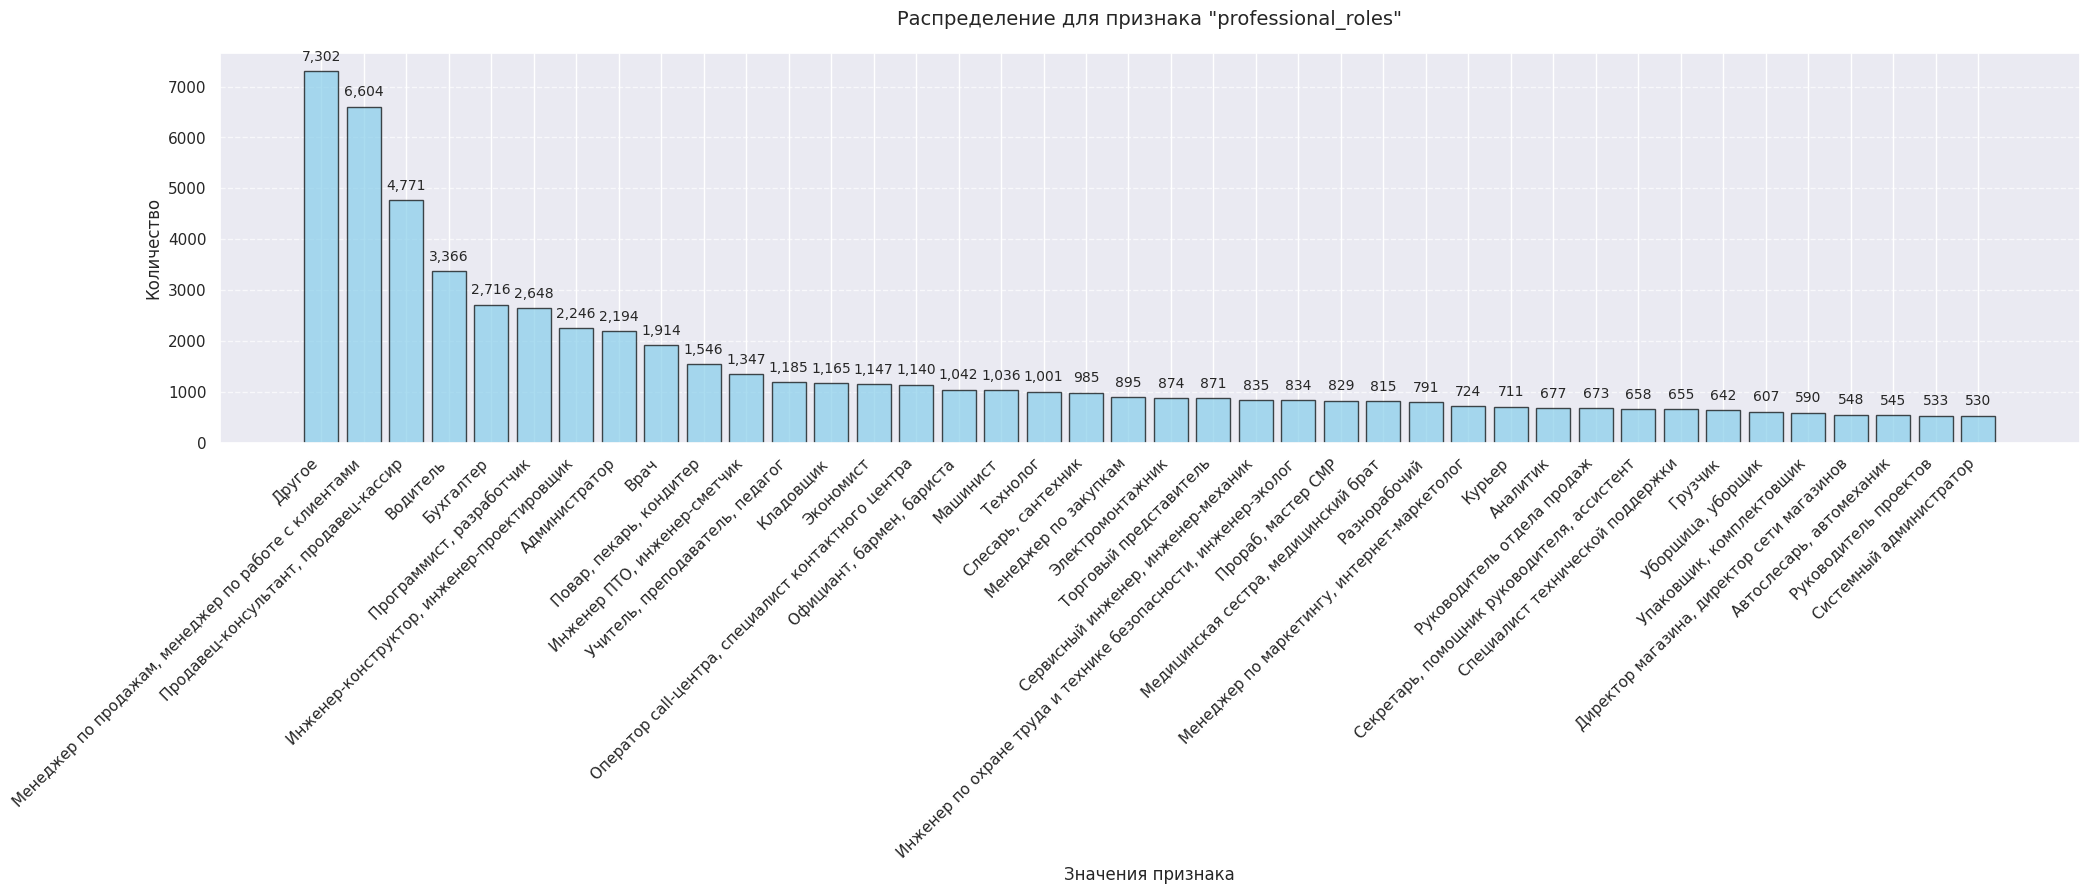

In [2466]:
# Создаем фигуру и оси размером 24x8 дюймов
plt.figure(figsize=(24, 6))

# Строим столбчатую диаграмму (гистограмму)
bars = plt.bar(value_counts[:40].index,           # Категории по оси X (значения признака)
               value_counts[:40].values,          # Высота столбцов (количество каждого значения)
               color='skyblue',                   # Цвет столбцов
               edgecolor='black',                 # Цвет границ столбцов
               alpha=0.7,                         # Прозрачность (0-1)
)

# Добавляем подписи значений сверху каждого столбца
for bar in bars:
    height = bar.get_height()                    # Получаем высоту текущего столбца
    plt.text(bar.get_x() + bar.get_width() / 2,  # Позиция X (по центру столбца)
             height + 0.02 * max(value_counts[:40]),  # Позиция Y (немного выше вершины столбца)
             f'{height:,}',                      # Форматированное число (с разделителями тысяч)
             ha='center',                        # Горизонтальное выравнивание по центру
             va='bottom',                        # Вертикальное выравнивание по низу
             fontsize=10                         # Размер шрифта
    )

# Настройка осей и заголовка
plt.title(f'Распределение для признака "{sign}"',  # Заголовок с именем признака
          fontsize=14,                             # Размер шрифта заголовка
          pad=20                                   # Отступ заголовка от графика
)
plt.xlabel('Значения признака', fontsize=12)       # Подпись оси X
plt.ylabel('Количество', fontsize=12)              # Подпись оси Y
plt.xticks(rotation=45, ha='right')                # Поворот подписей X на 45 градусов с выравниванием вправо
plt.grid(axis='y', linestyle='--', alpha=0.7)      # Сетка только по оси Y (пунктирная, полупрозрачная)

plt.subplots_adjust(bottom=0.25, top=0.9)  # Регулируем нижний и верхний отступ

# Отображение графика
plt.show()

Визуализируем распределение топ пяти значений категориального признака в виде круговой диаграммы с вынесенными значениями в легенду.

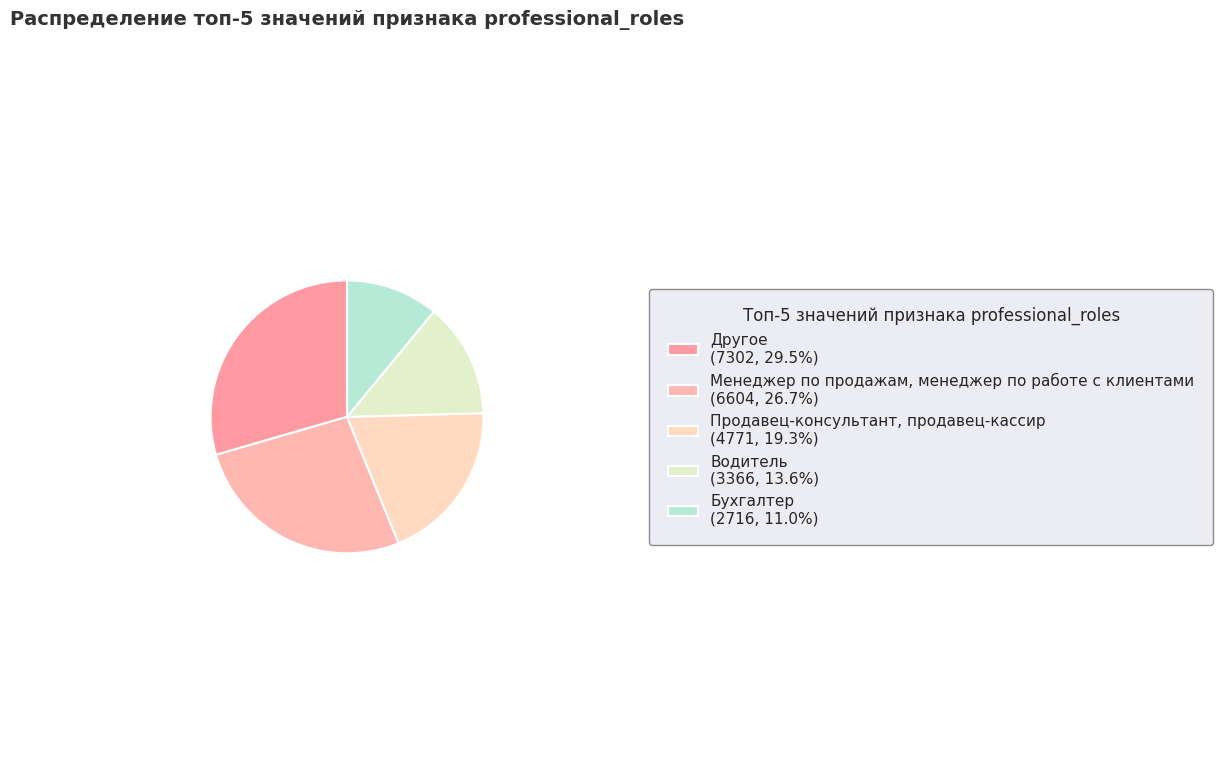

In [2467]:
# Создаем круговую диаграмму и получаем 3 набора объектов:
# patches - сектора диаграммы, texts - текстовые элементы (здесь пустые), autotexts - проценты (здесь пустые)

fig, ax = plt.subplots(figsize=(12, 8))

patches, texts, autotexts = plt.pie(
    top_5_most_frequent,   # Данные для отображения (топ-5 частых значений)
    labels=None,           # Не показываем стандартные подписи (будем использовать легенду)
    autopct='',            # Не показываем проценты внутри секторов (добавим в легенду)
    startangle=90,         # Начальный угол поворота (90° = начало сверху)
    colors=colors,         # Цвета для секторов
    wedgeprops=wedgeprops, # Свойства секторов (границы и т.д.)
    textprops=textprops,   # Свойства текста (размер шрифта)
)

# Рассчитываем общее количество (для вычисления процентов)
total = top_5_most_frequent.sum()

# Создаем список процентных соотношений с форматированием (1 знак после запятой)
percentages = [f'{(count/total)*100:.1f}%' for count in top_5_most_frequent.values]

# Формируем подписи для легенды в формате:
# Название категории
# (Абсолютное значение, Процентное соотношение)
legend_labels = [
    f'{label}\n({count}, {percent})'  # \n - перенос строки
    for label, count, percent in zip(
        top_5_most_frequent.index,    # Названия категорий
        top_5_most_frequent.values,   # Абсолютные значения
        percentages                   # Процентные соотношения
    )
]

# Создаем легенду с кастомными подписями
legend = plt.legend(patches,                                               # Сектора диаграммы (для отображения цветных маркеров)
                    legend_labels,                                         # Сформированные подписи
                    title=f"Топ-5 значений признака {sign}",      # Заголовок легенды
                    loc="center left",                                     # Позиционирование относительно диаграммы
                    bbox_to_anchor=(1.15, 0.5),                            # Смещение легенды (вправо на 15% от ширины)
                    fontsize=11,                                           # Размер шрифта подписей
                    title_fontsize=12,                                     # Размер шрифта заголовка
                    framealpha=0.9,                                        # Прозрачность фона легенды
                    edgecolor='gray',                                      # Цвет границы легенды
                    borderpad=1.2                                          # Отступ внутри легенды
)

# Добавляем заголовок диаграммы
plt.title(
    f'Распределение топ-5 значений признака {sign}',   # Текст заголовка
    pad=25,                                            # Отступ от верха диаграммы
    fontsize=14,                                       # Размер шрифта
    fontweight='bold',                                 # Жирное начертание
    color='#333333'                                    # Цвет текста (темно-серый)
)

# Делаем диаграмму идеально круглой (без искажений)
plt.axis('equal')

# Автоматически регулируем отступы для предотвращения обрезания элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Выводы по анализу признака:

  * О количестве уникальных значений признака:

    - 171 значение

  * О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось):

    - значение признака "Другое" встретилось 7302 раз

  * О распределении значений признака (наиболее встречаемые, наименее встречаемые):

    - Наиболее встречаемые:

      - Другое:	7302

      - Менеджер по продажам, менеджер по работе с клиентами: 6604

      - Продавец консультант, продавец-кассир: 4771

      - Водитель: 3366

      - Бухгалтер:	2716

    - Наименее встречаемые:

      - Продуктовый аналитик:	6

      - Контролёр ОТК:	5

      - Менеджер по компенсациям и льготам:	5

      - Казначей:	5

      - Директор юридического департамента (CLO):	3


  
  * О результатах графического анализа определенного топ признака (что показывает круговая диаграмма):
      
      - Другое:	7302, 29.5%

      - Менеджер по продажам, менеджер по работе с клиентами: 6604, 26.7%

      - Продавец консультант, продавец-кассир: 4771, 19.3%

      - Водитель: 3366, 13.6%

      - Бухгалтер:	2716, 11%

### 7.3 Признак experience

Сохраним имя признака в переменную sign

In [2468]:
sign = 'experience'

Оценим описательные статистики признака

In [2469]:
dataset[sign].describe()

,experience
count,81412
unique,4
top,1-3
freq,39313


Изучим уникальные значения признака

In [2470]:
dataset[sign].unique()

['1-3', '0', '3-6', '6-']
Categories (4, object): ['0', '1-3', '3-6', '6-']

Проведём неграфический структурный анализ

In [2471]:
dataset[sign].value_counts()

,count
experience,
1-3,39313
0,25731
3-6,14607
6-,1761


Сохраним результаты работы метода value_counts() в переменную value_counts, отсортировав значения

In [2472]:
value_counts = dataset[sign].value_counts().sort_values(ascending=False)

Визуализируем распределение топ четырёх значений категориального признака в виде круговой диаграммы с вынесенными значениями в легенду.

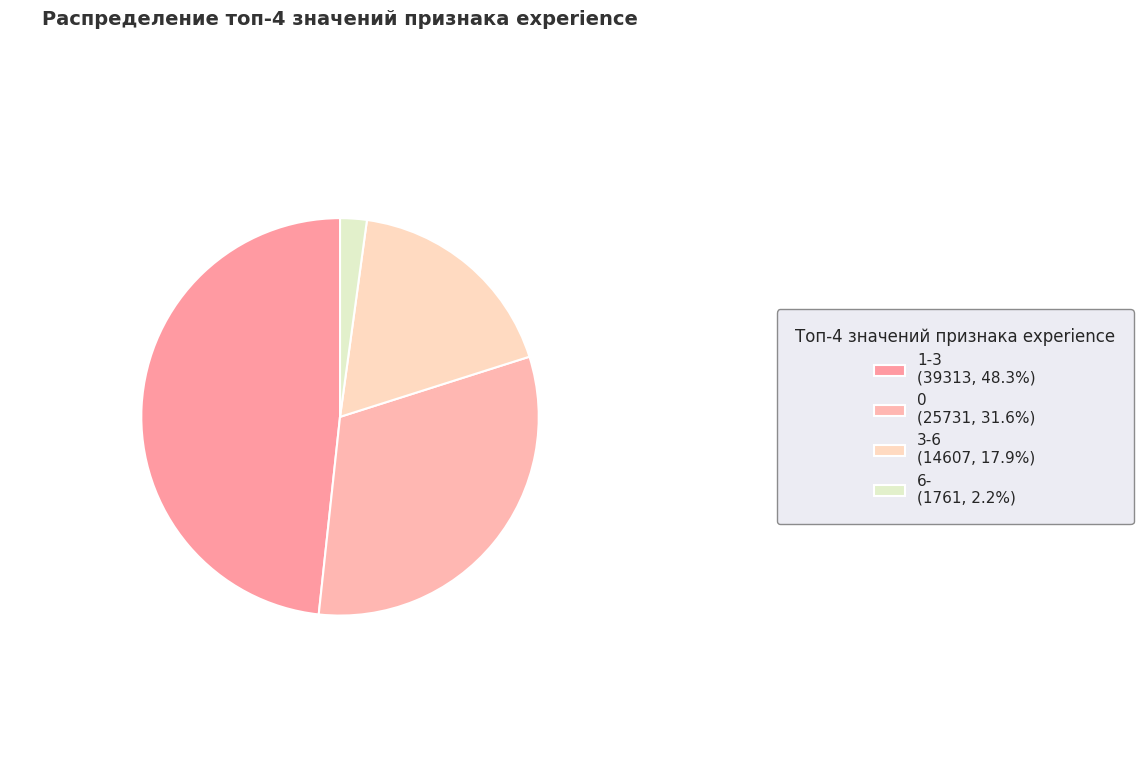

In [2473]:
# Создаем круговую диаграмму и получаем 3 набора объектов:
# patches - сектора диаграммы, texts - текстовые элементы (здесь пустые), autotexts - проценты (здесь пустые)

fig, ax = plt.subplots(figsize=(12, 8))

patches, texts, autotexts = plt.pie(
    value_counts,          # Данные для отображения (топ-5 частых значений)
    labels=None,           # Не показываем стандартные подписи (будем использовать легенду)
    autopct='',            # Не показываем проценты внутри секторов (добавим в легенду)
    startangle=90,         # Начальный угол поворота (90° = начало сверху)
    colors=colors,         # Цвета для секторов
    wedgeprops=wedgeprops, # Свойства секторов (границы и т.д.)
    textprops=textprops,   # Свойства текста (размер шрифта)
)

# Рассчитываем общее количество (для вычисления процентов)
total = value_counts.sum()

# Создаем список процентных соотношений с форматированием (1 знак после запятой)
percentages = [f'{(count/total)*100:.1f}%' for count in value_counts.values]

# Формируем подписи для легенды в формате:
# Название категории
# (Абсолютное значение, Процентное соотношение)
legend_labels = [
    f'{label}\n({count}, {percent})'  # \n - перенос строки
    for label, count, percent in zip(
        value_counts.index,           # Названия категорий
        value_counts.values,          # Абсолютные значения
        percentages                   # Процентные соотношения
    )
]

# Создаем легенду с кастомными подписями
legend = plt.legend(patches,                                               # Сектора диаграммы (для отображения цветных маркеров)
                    legend_labels,                                         # Сформированные подписи
                    title=f"Топ-4 значений признака {sign}",               # Заголовок легенды
                    loc="center left",                                     # Позиционирование относительно диаграммы
                    bbox_to_anchor=(1.15, 0.5),                            # Смещение легенды (вправо на 15% от ширины)
                    fontsize=11,                                           # Размер шрифта подписей
                    title_fontsize=12,                                     # Размер шрифта заголовка
                    framealpha=0.9,                                        # Прозрачность фона легенды
                    edgecolor='gray',                                      # Цвет границы легенды
                    borderpad=1.2                                          # Отступ внутри легенды
)

# Добавляем заголовок диаграммы
plt.title(f'Распределение топ-4 значений признака {sign}',   # Текст заголовка
          pad=25,                                            # Отступ от верха диаграммы
          fontsize=14,                                       # Размер шрифта
          fontweight='bold',                                 # Жирное начертание
          color='#333333'                                    # Цвет текста (темно-серый)
)

# Делаем диаграмму идеально круглой (без искажений)
plt.axis('equal')

# Автоматически регулируем отступы для предотвращения обрезания элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Выводы по анализу признака:

  * О количестве уникальных значений признака:

    - 4 значения

  * О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось):

    - значение признака "1-3" встретилось 39313 раз

  * О распределении значений признака (наиболее встречаемые, наименее встречаемые):

    - Наиболее встречаемые:

      - 1-3:	39313

      - 0:	25731

    - Наименее встречаемые:

      - 3-6:	14607

      - 6-:	1761

  
  * О результатах графического анализа определенного топ признака (что показывает круговая диаграмма):

      - 1-3:	39313, 48.3%

      - 0:	25731, 31.6%

      - 3-6:	14607, 17.9%

      - 6-:	1761, 2.2%

### 7.4 Признак schedule

Сохраним имя признака в переменную sign

In [2474]:
sign = 'schedule'

Оценим описательные статистики признака

In [2475]:
dataset[sign].describe()

,schedule
count,81412
unique,5
top,full_day
freq,60168


Изучим уникальные значения признака

In [2476]:
dataset[sign].unique()

['full_day', 'shift', 'remote', 'labor', 'flexible']
Categories (5, object): ['flexible', 'full_day', 'labor', 'remote', 'shift']

Проведём неграфический структурный анализ

In [2477]:
dataset[sign].value_counts()

,count
schedule,
full_day,60168
shift,8819
labor,5948
flexible,3265
remote,3212


Сохраним результаты работы метода value_counts() в переменную value_counts, отсортировав значения

In [2478]:
value_counts = dataset[sign].value_counts().sort_values(ascending=False)

Визуализируем распределение топ пяти значений категориального признака в виде круговой диаграммы с вынесенными значениями в легенду.

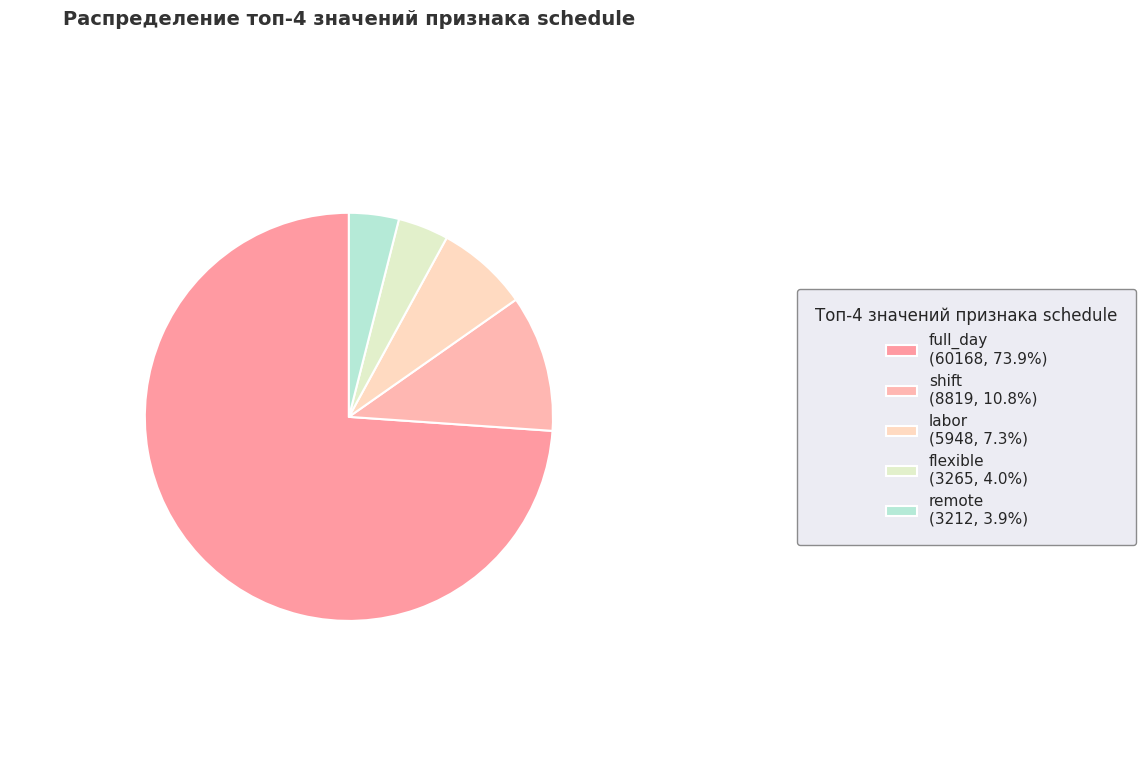

In [2479]:
# Создаем круговую диаграмму и получаем 3 набора объектов:
# patches - сектора диаграммы, texts - текстовые элементы (здесь пустые), autotexts - проценты (здесь пустые)

fig, ax = plt.subplots(figsize=(12, 8))

patches, texts, autotexts = plt.pie(
    value_counts,          # Данные для отображения (топ-5 частых значений)
    labels=None,           # Не показываем стандартные подписи (будем использовать легенду)
    autopct='',            # Не показываем проценты внутри секторов (добавим в легенду)
    startangle=90,         # Начальный угол поворота (90° = начало сверху)
    colors=colors,         # Цвета для секторов
    wedgeprops=wedgeprops, # Свойства секторов (границы и т.д.)
    textprops=textprops,   # Свойства текста (размер шрифта)
)

# Рассчитываем общее количество (для вычисления процентов)
total = value_counts.sum()

# Создаем список процентных соотношений с форматированием (1 знак после запятой)
percentages = [f'{(count/total)*100:.1f}%' for count in value_counts.values]

# Формируем подписи для легенды в формате:
# Название категории
# (Абсолютное значение, Процентное соотношение)
legend_labels = [
    f'{label}\n({count}, {percent})'  # \n - перенос строки
    for label, count, percent in zip(
        value_counts.index,           # Названия категорий
        value_counts.values,          # Абсолютные значения
        percentages                   # Процентные соотношения
    )
]

# Создаем легенду с кастомными подписями
legend = plt.legend(patches,                                               # Сектора диаграммы (для отображения цветных маркеров)
                    legend_labels,                                         # Сформированные подписи
                    title=f"Топ-4 значений признака {sign}",               # Заголовок легенды
                    loc="center left",                                     # Позиционирование относительно диаграммы
                    bbox_to_anchor=(1.15, 0.5),                            # Смещение легенды (вправо на 15% от ширины)
                    fontsize=11,                                           # Размер шрифта подписей
                    title_fontsize=12,                                     # Размер шрифта заголовка
                    framealpha=0.9,                                        # Прозрачность фона легенды
                    edgecolor='gray',                                      # Цвет границы легенды
                    borderpad=1.2                                          # Отступ внутри легенды
)

# Добавляем заголовок диаграммы
plt.title(f'Распределение топ-4 значений признака {sign}',   # Текст заголовка
          pad=25,                                            # Отступ от верха диаграммы
          fontsize=14,                                       # Размер шрифта
          fontweight='bold',                                 # Жирное начертание
          color='#333333'                                    # Цвет текста (темно-серый)
)

# Делаем диаграмму идеально круглой (без искажений)
plt.axis('equal')

# Автоматически регулируем отступы для предотвращения обрезания элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Выводы по анализу признака:

  * О количестве уникальных значений признака:

    - 5 значений

  * О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось):

    - значение признака "full_day" встретилось 60168 раз

  * О распределении значений признака (наиболее встречаемые, наименее встречаемые):

    - Наиболее встречаемые:

      - full_day: 60168

      - shift: 8819

      - labor: 5948

    - Наименее встречаемые:

      - flexible: 3265

      - remote: 3212

  
  * О результатах графического анализа определенного топ признака (что показывает круговая диаграмма):

      - full_day: 60168, 73.9%

      - shift: 8819, 10.8%

      - labor: 5948, 7.3%

      - flexible: 3265, 4.0%

      - remote: 3212, 3.9%


### 7.5 Признак employment

Сохраним имя признака в переменную sign

In [2480]:
sign = 'employment'

Оценим описательные статистики признака

In [2481]:
dataset[sign].describe()

,employment
count,81412
unique,4
top,full
freq,75885


Изучим уникальные значения признака

In [2482]:
dataset[sign].unique()

['full', 'part', 'project', 'probation']
Categories (4, object): ['full', 'part', 'probation', 'project']

Проведём неграфический структурный анализ

In [2483]:
dataset[sign].value_counts()

,count
employment,
full,75885
part,4611
probation,622
project,294


Сохраним результаты работы метода value_counts() в переменную value_counts, отсортировав значения

In [2484]:
value_counts = dataset[sign].value_counts().sort_values(ascending=False)

Визуализируем распределение топ четырёх значений категориального признака в виде круговой диаграммы с вынесенными значениями в легенду.

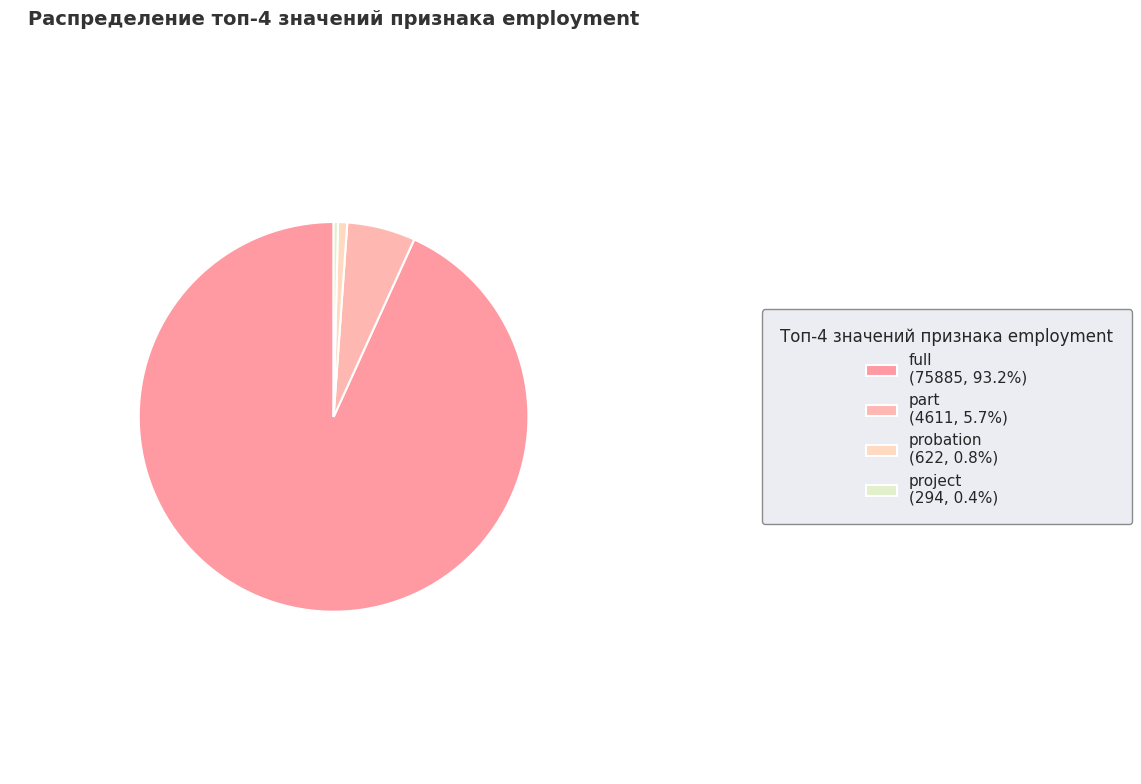

In [2485]:
# Создаем круговую диаграмму и получаем 3 набора объектов:
# patches - сектора диаграммы, texts - текстовые элементы (здесь пустые), autotexts - проценты (здесь пустые)

fig, ax = plt.subplots(figsize=(12, 8))

patches, texts, autotexts = plt.pie(
    value_counts,          # Данные для отображения (топ-5 частых значений)
    labels=None,           # Не показываем стандартные подписи (будем использовать легенду)
    autopct='',            # Не показываем проценты внутри секторов (добавим в легенду)
    startangle=90,         # Начальный угол поворота (90° = начало сверху)
    colors=colors,         # Цвета для секторов
    wedgeprops=wedgeprops, # Свойства секторов (границы и т.д.)
    textprops=textprops,   # Свойства текста (размер шрифта)
)

# Рассчитываем общее количество (для вычисления процентов)
total = value_counts.sum()

# Создаем список процентных соотношений с форматированием (1 знак после запятой)
percentages = [f'{(count/total)*100:.1f}%' for count in value_counts.values]

# Формируем подписи для легенды в формате:
# Название категории
# (Абсолютное значение, Процентное соотношение)
legend_labels = [
    f'{label}\n({count}, {percent})'  # \n - перенос строки
    for label, count, percent in zip(
        value_counts.index,           # Названия категорий
        value_counts.values,          # Абсолютные значения
        percentages                   # Процентные соотношения
    )
]

# Создаем легенду с кастомными подписями
legend = plt.legend(patches,                                               # Сектора диаграммы (для отображения цветных маркеров)
                    legend_labels,                                         # Сформированные подписи
                    title=f"Топ-4 значений признака {sign}",               # Заголовок легенды
                    loc="center left",                                     # Позиционирование относительно диаграммы
                    bbox_to_anchor=(1.15, 0.5),                            # Смещение легенды (вправо на 15% от ширины)
                    fontsize=11,                                           # Размер шрифта подписей
                    title_fontsize=12,                                     # Размер шрифта заголовка
                    framealpha=0.9,                                        # Прозрачность фона легенды
                    edgecolor='gray',                                      # Цвет границы легенды
                    borderpad=1.2                                          # Отступ внутри легенды
)

# Добавляем заголовок диаграммы
plt.title(f'Распределение топ-4 значений признака {sign}',   # Текст заголовка
          pad=25,                                            # Отступ от верха диаграммы
          fontsize=14,                                       # Размер шрифта
          fontweight='bold',                                 # Жирное начертание
          color='#333333'                                    # Цвет текста (темно-серый)
)

# Делаем диаграмму идеально круглой (без искажений)
plt.axis('equal')

# Автоматически регулируем отступы для предотвращения обрезания элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Выводы по анализу признака:

  * О количестве уникальных значений признака:

    - 4 значения

  * О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось):

    - значение признака "full_day" встретилось 75885 раз

  * О распределении значений признака (наиболее встречаемые, наименее встречаемые):

    - Наиболее встречаемые:

      - full:	75885

      - part: 4611

    - Наименее встречаемые:

      - probation: 622

      - project: 294
  
  * О результатах графического анализа определенного топ признака (что показывает круговая диаграмма):

    - full:	75885, 93.2%

    - part: 4611, 5.7%

    - probation: 622, 0.8%

    - project: 294, 0.4%

### 7.6 Признак employer

Сохраним имя признака в переменную sign

In [2486]:
sign = 'employer'

Оценим описательные статистики признака

In [2487]:
dataset[sign].describe()

,employer
count,81412
unique,4394
top,Сибгарант +
freq,655


Изучим уникальные значения признака

In [2488]:
dataset[sign].unique()

<StringArray>
[        'Стройкомплектсервис',                      'Квазар',
                'Staff-Linear',                   'AYS GROUP',
       'ЛАМА, Группа компаний',               'Деталь Проект',
           'Автоцентр АВТОГИК',                 'Эко-Системы',
    'Мототека, филиал г.Томск',                     'ДомПлюс',
 ...
                  'Риэлт Плюс', 'Филиппова Марина Николаевна',
                        'Вега',                 'АСС-Холдинг',
                  'Grand Line',                       'Омега',
                 'Инста Пермь',                     'Tantuni',
                  'СТОМСЕРВИС',                 'Night smoke']
Length: 4394, dtype: string

Проведём неграфический структурный анализ

In [2489]:
dataset[sign].value_counts()

,count
employer,
Сибгарант +,655
Стройся,585
"СИБУР, Группа компаний",583
"ЛАМА, Группа компаний",449
ОГКУ ЦЗН города Томска и Томского района,381
...,...
Массажная мастерская,1
РосПром Персонал,1
Дело в креме,1


Сохраним результаты работы метода value_counts() в переменную value_counts, отсортировав значения

In [2490]:
value_counts = dataset[sign].value_counts().sort_values(ascending=False)
value_counts.head(30)

,count
employer,
Сибгарант +,655
Стройся,585
"СИБУР, Группа компаний",583
"ЛАМА, Группа компаний",449
ОГКУ ЦЗН города Томска и Томского района,381
Томский Электротехнический Завод,327
Научно-исследовательский институт полупроводниковых приборов,321
ОГКУ Облстройзаказчик,314
Научно-производственная фирма Микран,312


Сохраним 5 самых часто встречающихся значений в переменную top_5_most_frequent

In [2491]:
top_5_most_frequent = value_counts[:5]
top_5_most_frequent

,count
employer,
Сибгарант +,655
Стройся,585
"СИБУР, Группа компаний",583
"ЛАМА, Группа компаний",449
ОГКУ ЦЗН города Томска и Томского района,381


Визуализируeм распределение 40 самых часто встречаемых значений категориального признака в виде гистограммы

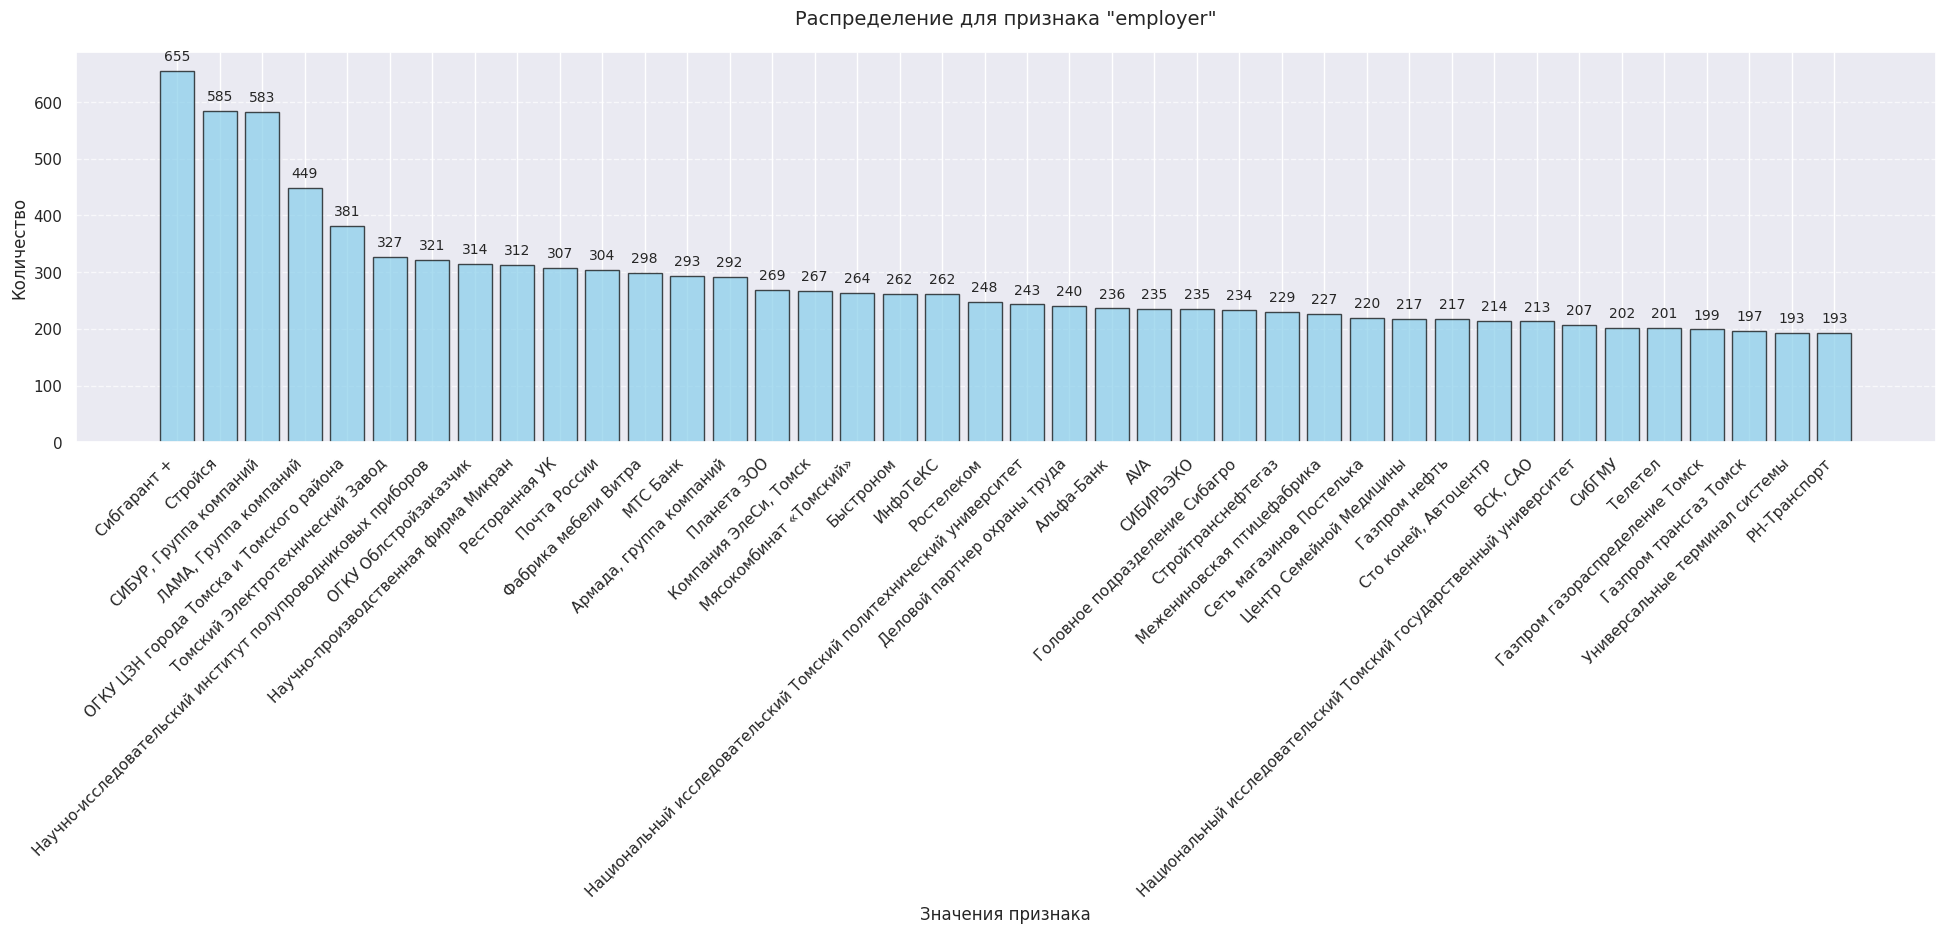

In [2492]:
# Создаем фигуру и оси размером 24x8 дюймов
plt.figure(figsize=(24, 6))

# Строим столбчатую диаграмму (гистограмму)
bars = plt.bar(value_counts[:40].index,           # Категории по оси X (значения признака)
               value_counts[:40].values,          # Высота столбцов (количество каждого значения)
               color='skyblue',                   # Цвет столбцов
               edgecolor='black',                 # Цвет границ столбцов
               alpha=0.7,                         # Прозрачность (0-1)
)

# Добавляем подписи значений сверху каждого столбца
for bar in bars:
    height = bar.get_height()                    # Получаем высоту текущего столбца
    plt.text(bar.get_x() + bar.get_width() / 2,  # Позиция X (по центру столбца)
             height + 0.02 * max(value_counts[:40]),  # Позиция Y (немного выше вершины столбца)
             f'{height:,}',                      # Форматированное число (с разделителями тысяч)
             ha='center',                        # Горизонтальное выравнивание по центру
             va='bottom',                        # Вертикальное выравнивание по низу
             fontsize=10                         # Размер шрифта
    )

# Настройка осей и заголовка
plt.title(f'Распределение для признака "{sign}"',  # Заголовок с именем признака
          fontsize=14,                             # Размер шрифта заголовка
          pad=20                                   # Отступ заголовка от графика
)
plt.xlabel('Значения признака', fontsize=12)       # Подпись оси X
plt.ylabel('Количество', fontsize=12)              # Подпись оси Y
plt.xticks(rotation=45, ha='right')                # Поворот подписей X на 45 градусов с выравниванием вправо
plt.grid(axis='y', linestyle='--', alpha=0.7)      # Сетка только по оси Y (пунктирная, полупрозрачная)

plt.subplots_adjust(bottom=0.25, top=0.9)  # Регулируем нижний и верхний отступ

# Отображение графика
plt.show()

Визуализируем распределение топ пяти значений категориального признака в виде круговой диаграммы с вынесенными значениями в легенду.

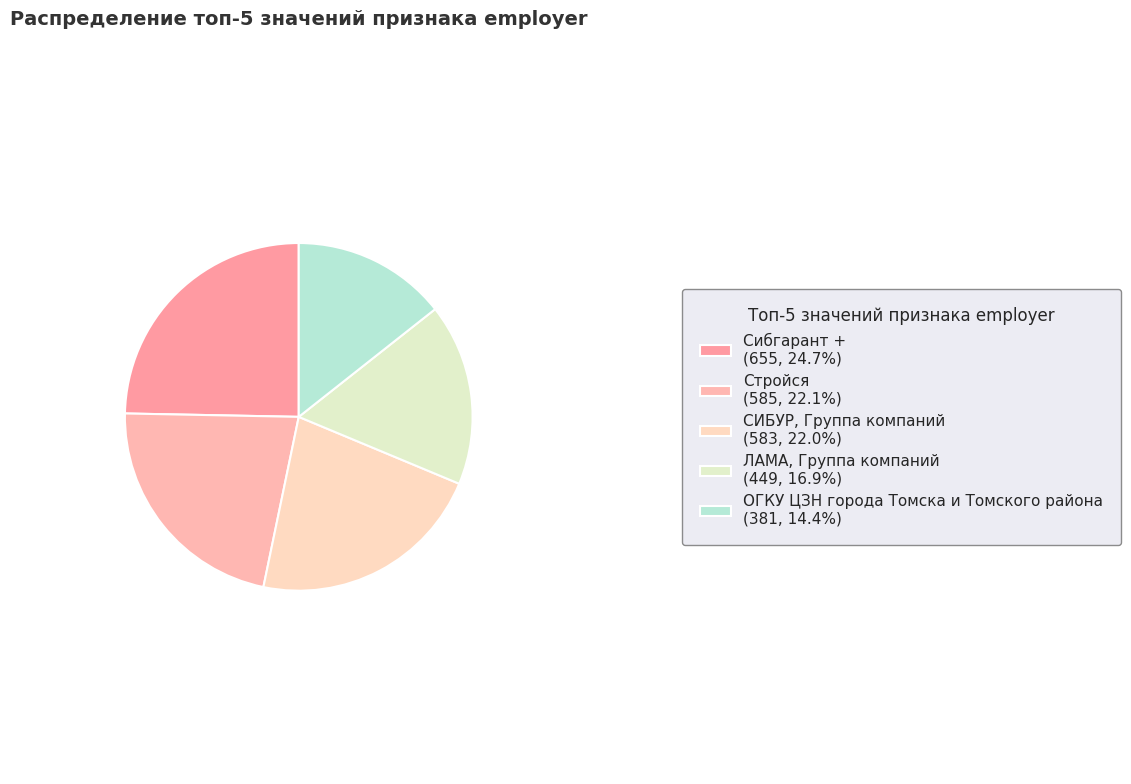

In [2493]:
# Создаем круговую диаграмму и получаем 3 набора объектов:
# patches - сектора диаграммы, texts - текстовые элементы (здесь пустые), autotexts - проценты (здесь пустые)

fig, ax = plt.subplots(figsize=(12, 8))

patches, texts, autotexts = plt.pie(
    top_5_most_frequent,   # Данные для отображения (топ-5 частых значений)
    labels=None,           # Не показываем стандартные подписи (будем использовать легенду)
    autopct='',            # Не показываем проценты внутри секторов (добавим в легенду)
    startangle=90,         # Начальный угол поворота (90° = начало сверху)
    colors=colors,         # Цвета для секторов
    wedgeprops=wedgeprops, # Свойства секторов (границы и т.д.)
    textprops=textprops,   # Свойства текста (размер шрифта)
)

# Рассчитываем общее количество (для вычисления процентов)
total = top_5_most_frequent.sum()

# Создаем список процентных соотношений с форматированием (1 знак после запятой)
percentages = [f'{(count/total)*100:.1f}%' for count in top_5_most_frequent.values]

# Формируем подписи для легенды в формате:
# Название категории
# (Абсолютное значение, Процентное соотношение)
legend_labels = [
    f'{label}\n({count}, {percent})'  # \n - перенос строки
    for label, count, percent in zip(
        top_5_most_frequent.index,    # Названия категорий
        top_5_most_frequent.values,   # Абсолютные значения
        percentages                   # Процентные соотношения
    )
]

# Создаем легенду с кастомными подписями
legend = plt.legend(patches,                                               # Сектора диаграммы (для отображения цветных маркеров)
                    legend_labels,                                         # Сформированные подписи
                    title=f"Топ-5 значений признака {sign}",      # Заголовок легенды
                    loc="center left",                                     # Позиционирование относительно диаграммы
                    bbox_to_anchor=(1.15, 0.5),                            # Смещение легенды (вправо на 15% от ширины)
                    fontsize=11,                                           # Размер шрифта подписей
                    title_fontsize=12,                                     # Размер шрифта заголовка
                    framealpha=0.9,                                        # Прозрачность фона легенды
                    edgecolor='gray',                                      # Цвет границы легенды
                    borderpad=1.2                                          # Отступ внутри легенды
)

# Добавляем заголовок диаграммы
plt.title(
    f'Распределение топ-5 значений признака {sign}',   # Текст заголовка
    pad=25,                                            # Отступ от верха диаграммы
    fontsize=14,                                       # Размер шрифта
    fontweight='bold',                                 # Жирное начертание
    color='#333333'                                    # Цвет текста (темно-серый)
)

# Делаем диаграмму идеально круглой (без искажений)
plt.axis('equal')

# Автоматически регулируем отступы для предотвращения обрезания элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Выводы по анализу признака:

  * О количестве уникальных значений признака:

    - 4394 значений

  * О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось):

    - значение признака "Сибгарант +" встретилось 655 раз

  * О распределении значений признака (наиболее встречаемые, наименее встречаемые):

    - Наиболее встречаемые:

      - Сибгарант +: 655

      - Стройся:	585

      - Сибур.Группа компаний: 583

      - ЛАМА.Группа компаний: 449

      - ОГКУ ЦЗН города Томска и Томского района:	381
      
    - Наименее встречаемые:

      - Массажная мастерская:	1

      - РосПром Персонал:	1

      - Дело в креме:	1

      - СТОМСЕРВИС:	1

      - К-ХОЛДИНГ:	1

  * О результатах графического анализа определенного топ признака (что показывает круговая диаграмма):

      - Сибгарант +: 655, 24.7%

      - Стройся:	585, 22.1%

      - Сибур.Группа компаний: 583, 22%

      - ЛАМА.Группа компаний: 449, 16.9%

      - ОГКУ ЦЗН города Томска и Томского района:	381, 14.4%

### 7.7 Признак key_skills

Сохраним имя признака в переменную sign

In [2494]:
sign = 'key_skills'

Оценим описательные статистики признака

In [2495]:
dataset[sign].describe()

,key_skills
count,81412
unique,846
top,Работа в команде
freq,7444


Изучим уникальные значения признака

In [2496]:
dataset[sign].unique()

<StringArray>
[                                  'ANSYS',
                                 'AutoCAD',
                       'Autodesk Inventor',
                              'SolidWorks',
 'Разработка конструкторской документации',
                               'КОМПАС-3D',
       'Разработка проектной документации',
                     'Разработка чертежей',
                          'Грамотная речь',
                       'Базовые знания ПК',
 ...
                              'QuickBooks',
                                  'Zeplin',
                 'Выполнение горных работ',
                                     'SAN',
               'Оценка платежеспособности',
                               'Полировка',
          'Знания в области металлографии',
                                   'KiCad',
            'Продажа легковых автомобилей',
                                '1С: ТОИР']
Length: 846, dtype: string

Проведём неграфический структурный анализ

In [2497]:
dataset[sign].value_counts()

,count
key_skills,
Работа в команде,7444
Коммуникативная грамотность,5250
Базовые знания ПК,5163
Грамотная речь,4194
Продажи,2611
...,...
Полировка,1
Знания в области металлографии,1
KiCad,1


Сохраним результаты работы метода value_counts() в переменную value_counts

In [2498]:
value_counts = dataset[sign].value_counts().sort_values(ascending=False)
value_counts.head(30)

,count
key_skills,
Работа в команде,7444
Коммуникативная грамотность,5250
Базовые знания ПК,5163
Грамотная речь,4194
Продажи,2611
Ведение документооборота,2437
Организаторские навыки,1914
Ответственность,1691
Многозадачность,1575


Сохраним 5 самых часто встречающихся навыков в переменную top_5_most_frequent

In [2499]:
top_5_most_frequent = value_counts[:5]
top_5_most_frequent

,count
key_skills,
Работа в команде,7444
Коммуникативная грамотность,5250
Базовые знания ПК,5163
Грамотная речь,4194
Продажи,2611


Визуализируeм распределение 40 самых часто встречаемых значений категориального признака в виде гистограммы

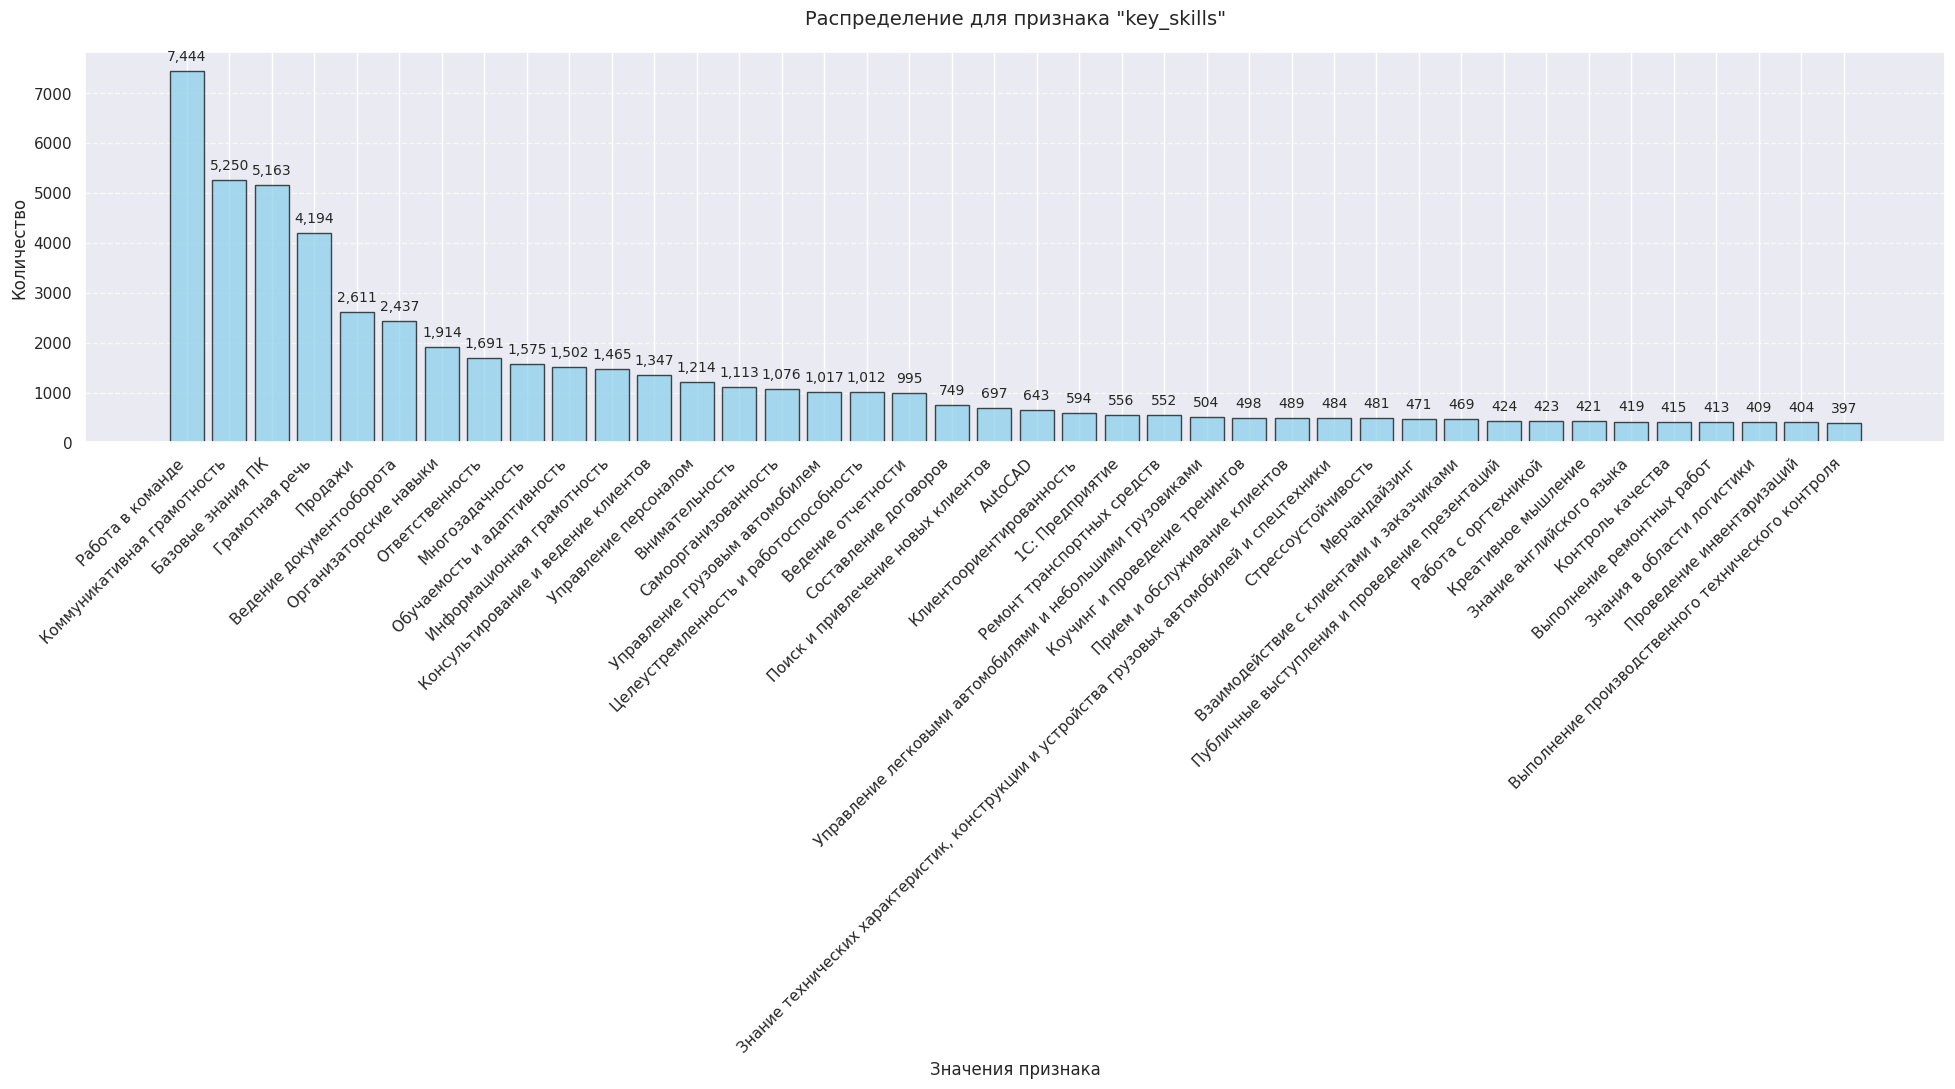

In [2500]:
# Создаем фигуру и оси размером 24x8 дюймов
plt.figure(figsize=(24, 6))

# Строим столбчатую диаграмму (гистограмму)
bars = plt.bar(value_counts[:40].index,           # Категории по оси X (значения признака)
               value_counts[:40].values,          # Высота столбцов (количество каждого значения)
               color='skyblue',                   # Цвет столбцов
               edgecolor='black',                 # Цвет границ столбцов
               alpha=0.7,                         # Прозрачность (0-1)
)

# Добавляем подписи значений сверху каждого столбца
for bar in bars:
    height = bar.get_height()                    # Получаем высоту текущего столбца
    plt.text(bar.get_x() + bar.get_width() / 2,  # Позиция X (по центру столбца)
             height + 0.02 * max(value_counts[:40]),  # Позиция Y (немного выше вершины столбца)
             f'{height:,}',                      # Форматированное число (с разделителями тысяч)
             ha='center',                        # Горизонтальное выравнивание по центру
             va='bottom',                        # Вертикальное выравнивание по низу
             fontsize=10                         # Размер шрифта
    )

# Настройка осей и заголовка
plt.title(f'Распределение для признака "{sign}"',  # Заголовок с именем признака
          fontsize=14,                             # Размер шрифта заголовка
          pad=20                                   # Отступ заголовка от графика
)
plt.xlabel('Значения признака', fontsize=12)       # Подпись оси X
plt.ylabel('Количество', fontsize=12)              # Подпись оси Y
plt.xticks(rotation=45, ha='right')                # Поворот подписей X на 45 градусов с выравниванием вправо
plt.grid(axis='y', linestyle='--', alpha=0.7)      # Сетка только по оси Y (пунктирная, полупрозрачная)

plt.subplots_adjust(bottom=0.25, top=0.9)  # Регулируем нижний и верхний отступ

# Отображение графика
plt.show()

Визуализируем распределение топ пяти значений категориального признака в виде круговой диаграммы с вынесенными значениями в легенду.

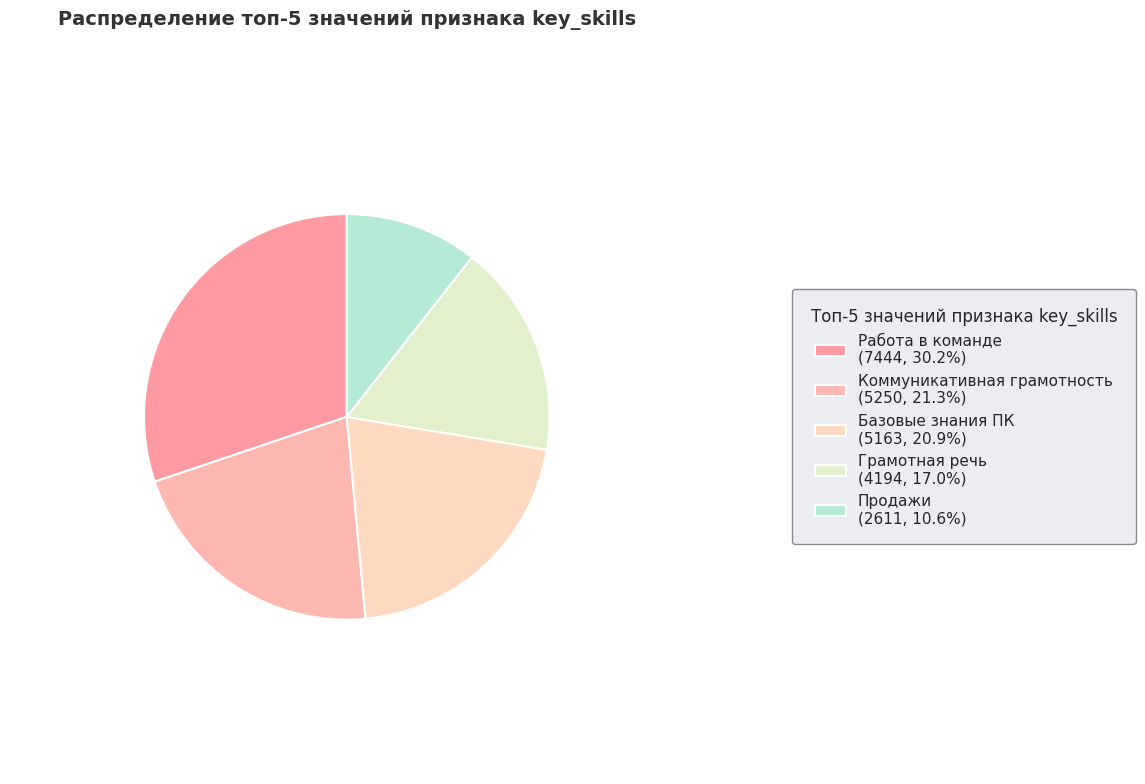

In [2501]:
# Создаем круговую диаграмму и получаем 3 набора объектов:
# patches - сектора диаграммы, texts - текстовые элементы (здесь пустые), autotexts - проценты (здесь пустые)

fig, ax = plt.subplots(figsize=(12, 8))

patches, texts, autotexts = plt.pie(
    top_5_most_frequent,   # Данные для отображения (топ-5 частых значений)
    labels=None,           # Не показываем стандартные подписи (будем использовать легенду)
    autopct='',            # Не показываем проценты внутри секторов (добавим в легенду)
    startangle=90,         # Начальный угол поворота (90° = начало сверху)
    colors=colors,         # Цвета для секторов
    wedgeprops=wedgeprops, # Свойства секторов (границы и т.д.)
    textprops=textprops,   # Свойства текста (размер шрифта)
)

# Рассчитываем общее количество (для вычисления процентов)
total = top_5_most_frequent.sum()

# Создаем список процентных соотношений с форматированием (1 знак после запятой)
percentages = [f'{(count/total)*100:.1f}%' for count in top_5_most_frequent.values]

# Формируем подписи для легенды в формате:
# Название категории
# (Абсолютное значение, Процентное соотношение)
legend_labels = [
    f'{label}\n({count}, {percent})'  # \n - перенос строки
    for label, count, percent in zip(
        top_5_most_frequent.index,    # Названия категорий
        top_5_most_frequent.values,   # Абсолютные значения
        percentages                   # Процентные соотношения
    )
]

# Создаем легенду с кастомными подписями
legend = plt.legend(patches,                                               # Сектора диаграммы (для отображения цветных маркеров)
                    legend_labels,                                         # Сформированные подписи
                    title=f"Топ-5 значений признака {sign}",      # Заголовок легенды
                    loc="center left",                                     # Позиционирование относительно диаграммы
                    bbox_to_anchor=(1.15, 0.5),                            # Смещение легенды (вправо на 15% от ширины)
                    fontsize=11,                                           # Размер шрифта подписей
                    title_fontsize=12,                                     # Размер шрифта заголовка
                    framealpha=0.9,                                        # Прозрачность фона легенды
                    edgecolor='gray',                                      # Цвет границы легенды
                    borderpad=1.2                                          # Отступ внутри легенды
)

# Добавляем заголовок диаграммы
plt.title(
    f'Распределение топ-5 значений признака {sign}',   # Текст заголовка
    pad=25,                                            # Отступ от верха диаграммы
    fontsize=14,                                       # Размер шрифта
    fontweight='bold',                                 # Жирное начертание
    color='#333333'                                    # Цвет текста (темно-серый)
)

# Делаем диаграмму идеально круглой (без искажений)
plt.axis('equal')

# Автоматически регулируем отступы для предотвращения обрезания элементов
plt.tight_layout()

# Отображаем диаграмму
plt.show()

Выводы по анализу признака:

  * О количестве уникальных значений признака:

    - 846 значений

  * О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось):

    - значение признака "Работа в команде" встретилось 7444 раза

  * О распределении значений признака (наиболее встречаемые, наименее встречаемые):

    - Наиболее встречаемые:

      - Работа в команде:	7444

      - Коммуникативная грамотность: 5250

      - Базовые знания ПК: 5163

      - Грамотная речь:	4194

      - Продажи: 2611

    - Наименее встречаемые:
    
      - Полировка	1

      - Знания в области металлографии	1
    
      - KiCad	1
    
      - Продажа легковых автомобилей	1
  
      - 1С: ТОИР	1




  
  * О результатах графического анализа определенного топ признака (что показывает круговая диаграмма):

      - Работа в команде:	7444, 30.2%

      - Коммуникативная грамотность: 5250, 21.3%

      - Базовые знания ПК: 5163, 20.9%

      - Грамотная речь:	4194, 17.0%

      - Продажи: 2611, 10.6%